In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Factores importantes a considerar usando K-means
- Número de clusters
- Semillas (Elección de centros iniciales)
- Outliers (La creación de cluster es muy sensitiva a outliers)
- Métricas de distancia
- K-means no funciona con datos categóricos (Y la conversión de estos a numéricos no es recomendable ya que carecen de "sentido de la distancia")
- El proceso puede no converger en el número dado de iteraciones; debe buscarse la convergencia.

In [134]:
basic_data = pd.read_csv('..\\7. Data Preparation\\Basic_information_cleaned4.csv', index_col=0)

In [135]:
basic_data.describe()

,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR
count,2763.000000,2843.000000,2941.000000,2941.000000,2941.000000,2878.000000,2878.0,2941.000000,2941.0,2.941000e+03,2938.000000,2938.000000,2941.000000,2938.000000
mean,0.148665,0.598875,24.128528,0.235243,0.055718,0.151166,0.0,0.008420,0.0,1.771141e+10,0.054496,0.070605,18.617817,0.016109
std,0.204964,0.322404,16.712753,0.066868,0.074392,0.042235,0.0,0.013921,0.0,9.247389e+10,0.186832,0.187062,9.715589,0.033579
min,0.000000,0.000000,3.000000,0.063465,0.000000,0.048128,0.0,0.000000,0.0,3.912982e+04,-0.800784,-0.800784,3.000000,0.000000
25%,0.011950,0.309050,12.000000,0.187619,0.000000,0.122243,0.0,0.000000,0.0,2.461289e+08,-0.017509,-0.000692,10.000000,0.000000
50%,0.053200,0.700800,22.000000,0.227619,0.017857,0.146747,0.0,0.003127,0.0,1.602521e+09,0.071553,0.088116,18.000000,0.003447
75%,0.202150,0.885200,31.000000,0.274903,0.093750,0.176695,0.0,0.011757,0.0,9.008307e+09,0.134765,0.149792,26.000000,0.017694
max,0.986500,0.999800,130.000000,0.558833,0.483871,0.465347,0.0,0.138614,0.0,2.317218e+12,2.972027,2.972027,39.000000,0.489939


# Construyendo el dataset

In [136]:
# Construcción del dataset
aux_fundamental_data = pd.read_csv("FinalFundamentals\\FB.csv", index_col=0)
aux_fundamental_data = aux_fundamental_data[aux_fundamental_data.columns[:101]].copy()


# Array vacío para guardar los resultados
res = np.empty([basic_data.shape[0], aux_fundamental_data.shape[1]])

num = 0
for index, row in basic_data.iterrows():
    ticker = index
    # Abrimos los fundamentales con el precio
    fundamental_data = pd.read_csv("FinalFundamentals\\"+ticker+".csv", index_col=0)
    try:
        fundamental_data.drop("Forex Rate", axis=1, inplace=True)
    except:
        pass

    fundamental_data = fundamental_data[fundamental_data.columns[:101]].copy()
    
    # Cogemos la media de los valores
    fundamental_data = fundamental_data.mean()


    # Para detectar aquellos con una columna de más
    if len(fundamental_data) == 198:
        print(ticker)

    # Las juntamos y las guardamos en el array
    res[num, :] = fundamental_data.to_numpy()
    num += 1

# Una vez creado el array, lo pasamos a un dataframe
res_df = pd.DataFrame(res, index=basic_data.index,columns=aux_fundamental_data.columns)
res_df.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

In [137]:
res_df


,Revenue,COGS,Gross Profit,Gross Profit Ratio,Research and Development Exp.,"Selling, General and Administrative Exp.",Other Expenses,Operating Expenses,COGS and Expenses,Interest Income,Interest Expense (Gain),Depreciation and Amortization,EBITDA,EBITDA Ratio,Operating Income,Operating Income Ratio,Total Other Income Expenses (Gains),Income Before Tax,Income Before Tax Ratio,Income Tax expense (Gain),Net Income,Net Income Ratio,EPS,EPS Diluted,Weighted Average Shares Outstanding,Weighted Average Shares Outstanding Diluted,Cash and Cash Equivalents,Short-Term Investments,Cash and Short-Term Investments,Net Receivables,Inventory (Balance),Other Current Assets,Total Current Assets,PP&E,Goodwill,Intangible Assets,Goodwill and Intangible Assets,Investments,Tax Assets,Other Non-Current Assets,Total Non-Current Assets,Other Assets,Total Assets,Accounts Payable (Balance),Short-Term Debt,Tax Payable,Deferred Revenue (Current),Other Current Liabilities,Total Current Liabilities,Long-Term Debt,Deferred Revenue (Non-Current),Deferred Tax Liabilities,Other Non-Current Liabilities,Total Non-Current Liabilities,Other Liabilities,Capital Lease Obligations,Total Liabilities,Preferred Stock,Common Stock,Retained Earnings,Other Comprehensive Income/Loss,Other Total Stockholders Equity,Total Stockholders Equity,Total Liabilities And Stockholders Equity,Minority Interest,Total Liabilities & Equity,Net Income (Cash Flow),Depreciation and Amortization (Cash Flow),Deferred Income Tax,Stock Based Compensation,Change in Working Capital,Accounts Receivable,Inventory (Cash Flow),Accounts Payable (Cash Flow),Other Working Capital,Other Non-Cash Items,Cash Provided by Operating Activities,CAPEX,Acquisitions Net,Purchases of Investments,Sales/Maturities of Investments,Other Investing Activities,Cash Used for Investing Activites,Debt Repayment,Common Stock Issued,Common Stock Repurchased,Dividends Paid,Other Financing Activites,Cash Used/Provided by Financing Activities,Effect of Forex Changes on Cash,Net Change In Cash,Cash at the End of Period,Cash at the Beginning of Period,Free Cash Flow,Open,Close,Adj Close,Volume,Dividend,Dividend Cum,Price with cum Dividends
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,6.072217e+09,3.056217e+09,3.016000e+09,0.501883,7.067826e+08,1.804957e+09,-5.260870e+06,2.506478e+09,5.562696e+09,9.217391e+06,4.852174e+07,3.175217e+08,8.971739e+08,0.178609,5.095217e+08,0.088691,2.160870e+07,5.311304e+08,0.091448,1.262609e+08,5.465217e+08,0.097135,1.582609,1.554783,3.774348e+08,3.851522e+08,2.085636e+09,1.356522e+07,2.099818e+09,9.573043e+08,8.921739e+08,4.539130e+08,4.311913e+09,1.053261e+09,1.567348e+09,5.310000e+08,2.098348e+09,7.395652e+07,2.878261e+07,8.238261e+08,4.078174e+09,0.000000,8.390087e+09,4.032174e+08,1.313478e+08,1.130435e+06,3.180000e+08,8.740000e+08,1.726565e+09,1.640522e+09,0.000000e+00,7.913043e+06,7.749130e+08,2.423348e+09,0.0,0.000000e+00,4.149913e+09,0.0,4.956522e+06,1.868478e+09,-4.356087e+08,2.800174e+09,4.238000e+09,8.387913e+09,2.173913e+06,8.390087e+09,5.465217e+08,3.175217e+08,-1.582609e+07,4.221739e+07,1.608696e+07,-2.573913e+07,-5.895652e+07,6.913043e+06,2.498696e+09,-1.133043e+08,7.932174e+08,-2.382609e+08,-3.882609e+08,-2.595652e+07,6.491304e+07,1.825217e+08,-4.050000e+08,-4.052174e+08,2.106087e+08,-6.596522e+08,-7.582609e+07,6.062609e+08,-3.238261e+08,8.695652e+04,6.176190e+07,2.086455e+09,2.076619e+09,5.549565e+08,40.577391,41.287391,38.819130,7.204312e+07,0.283857,2.058477,40.877608
AA,1.132375e+10,9.037125e+09,2.286625e+09,0.197825,4.312500e+07,2.837500e+07,1.074375e+09,1.145875e+09,1.018300e+10,0.000000e+00,1.887500e+08,7.458750e+08,1.325625e+09,0.095862,9.355000e+08,0.077902,-7.497500e+08,3.910000e+08,0.030212,4.283750e+08,-2.426250e+08,-0.024350,-1.145000,-1.150000,1.843164e+08,1.849244e+08,1.055875e+09,0.000000e+00,1.055875e+09,7.745000e+08,1.491000e+09,4.426250e+08,3.764000e+09,8.654375e+09,1.333750e+08,5.925000e+07,1.926250e+08

## Normalización

In [138]:
# Normalizamos los datos
normalizer = Normalizer()
old_index = res_df.index
old_columns = res_df.columns
normalized = normalizer.fit_transform(res_df.copy())
normalized_df = pd.DataFrame(normalized, index=old_index, columns=old_columns)


In [139]:
normalized_df

,Revenue,COGS,Gross Profit,Gross Profit Ratio,Research and Development Exp.,"Selling, General and Administrative Exp.",Other Expenses,Operating Expenses,COGS and Expenses,Interest Income,Interest Expense (Gain),Depreciation and Amortization,EBITDA,EBITDA Ratio,Operating Income,Operating Income Ratio,Total Other Income Expenses (Gains),Income Before Tax,Income Before Tax Ratio,Income Tax expense (Gain),Net Income,Net Income Ratio,EPS,EPS Diluted,Weighted Average Shares Outstanding,Weighted Average Shares Outstanding Diluted,Cash and Cash Equivalents,Short-Term Investments,Cash and Short-Term Investments,Net Receivables,Inventory (Balance),Other Current Assets,Total Current Assets,PP&E,Goodwill,Intangible Assets,Goodwill and Intangible Assets,Investments,Tax Assets,Other Non-Current Assets,Total Non-Current Assets,Other Assets,Total Assets,Accounts Payable (Balance),Short-Term Debt,Tax Payable,Deferred Revenue (Current),Other Current Liabilities,Total Current Liabilities,Long-Term Debt,Deferred Revenue (Non-Current),Deferred Tax Liabilities,Other Non-Current Liabilities,Total Non-Current Liabilities,Other Liabilities,Capital Lease Obligations,Total Liabilities,Preferred Stock,Common Stock,Retained Earnings,Other Comprehensive Income/Loss,Other Total Stockholders Equity,Total Stockholders Equity,Total Liabilities And Stockholders Equity,Minority Interest,Total Liabilities & Equity,Net Income (Cash Flow),Depreciation and Amortization (Cash Flow),Deferred Income Tax,Stock Based Compensation,Change in Working Capital,Accounts Receivable,Inventory (Cash Flow),Accounts Payable (Cash Flow),Other Working Capital,Other Non-Cash Items,Cash Provided by Operating Activities,CAPEX,Acquisitions Net,Purchases of Investments,Sales/Maturities of Investments,Other Investing Activities,Cash Used for Investing Activites,Debt Repayment,Common Stock Issued,Common Stock Repurchased,Dividends Paid,Other Financing Activites,Cash Used/Provided by Financing Activities,Effect of Forex Changes on Cash,Net Change In Cash,Cash at the End of Period,Cash at the Beginning of Period,Free Cash Flow,Open,Close,Adj Close,Volume,Dividend,Dividend Cum,Price with cum Dividends
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.288816,0.145364,0.143452,2.387130e-11,0.033617,0.085850,-0.000250,0.119217,0.264581,0.000438,0.002308,0.015102,0.042673,8.495259e-12,0.024235,4.218471e-12,0.001028,0.025262,4.349581e-12,0.006005,0.025994,4.620072e-12,7.527444e-11,7.395094e-11,0.017952,0.018319,0.099200,0.000645,0.099875,0.045533,0.042435,0.021590,0.205090,0.050097,0.074549,0.025256,0.099805,0.003518,0.001369,0.039184,0.193972,0.000000e+00,0.399062,0.019178,0.006247,0.000054,0.015125,0.041571,0.082122,0.078029,0.000000,0.000376,0.036858,0.115263,0.0,0.000000,0.197384,0.0,0.000236,0.088871,-0.020719,0.133186,0.201574,0.398959,0.000103,0.399062,0.025994,0.015102,-0.000753,0.002008,0.000765,-0.001224,-0.002804,0.000329,0.118847,-0.005389,0.037728,-0.011333,-0.018467,-0.001235,0.003087,0.008681,-0.019263,-0.019274,0.010017,-0.031375,-0.003607,0.028836,-0.015402,0.000004,2.937614e-03,0.099239,0.098771,0.026396,1.930004e-09,1.963774e-09,1.846375e-09,0.003427,1.350124e-11,9.790844e-11,1.944283e-09
AA,0.283562,0.226302,0.057260,4.953807e-12,0.001080,0.000711,0.026904,0.028694,0.254996,0.000000,0.004727,0.018678,0.033195,2.400527e-12,0.023426,1.950771e-12,-0.018775,0.009791,7.565621e-13,0.010727,-0.006076,-6.097571e-13,-2.867236e-11,-2.879756e-11,0.004616,0.004631,0.026441,0.000000,0.026441,0.019395,0.037337,0.011084,0.094256,0.216717,0.003340,0.001484,0.004824,0.033618,0.017435,0.039174,0.311768,0.000000e+00,0.406024,0.039741,0.000279,0.005324,0.000000,0.030967,0.070986,0.035380,0.001499,0.000000,0.098998,0.135878,0.0,0.000570,0.206864,0.0,0.071897,-0.005196,-0.099123,0.240443,0.149209,0.356072,0.049951,0.406024,-0.006076,0.016599,0.000833,0.000798,0.003102,0.000000,-0.002532,0.001246,0.018568,0.000639,0.015895,-0.009907,0.00990

## Eligiendo el mejor número de clusters

### Elbow method

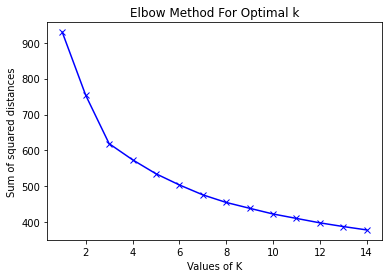

In [140]:
Sum_of_squared_distances = []
K = range(1,15)

for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=100)
 kmeans.fit(normalized_df)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances") 
plt.title("Elbow Method For Optimal k")
plt.show()

### Silhouette analysis

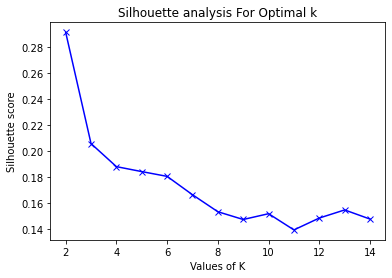

In [141]:
range_n_clusters = range(2,15)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=100)
 kmeans.fit(normalized_df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(normalized_df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

## Aplicando K-means

In [142]:
km = KMeans(n_clusters=1, init="k-means++", random_state=10)
clusters = km.fit_predict(normalized_df)
# labels = km.labels_

res_df["Cluster"] = clusters
basic_data['Cluster'] = clusters

In [143]:
from scipy.spatial.distance import cdist
# obtaining the centers of the clusters
centroids = km.cluster_centers_
# points array will be used to reach the index easy
points = np.empty((0,normalized_df.shape[1]), float)
# distances will be used to calculate outliers
distances = np.empty((0,normalized_df.shape[1]), float)
# getting points and distances
for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    distances = np.append(distances, cdist([center_elem],normalized_df[clusters == i], 'euclidean')) 
    points = np.append(points, normalized_df[clusters == i], axis=0)

In [144]:
distances_df = pd.DataFrame(distances, index=normalized_df.index, columns=["Distance"])
percentile = 75
drop_list = distances_df[distances_df["Distance"] > np.percentile(distances_df["Distance"], percentile)]

In [145]:
basic_data.drop(drop_list.index, inplace=True)

In [146]:
basic_data.describe()

,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR,Cluster
count,2067.000000,2176.000000,2206.000000,2206.000000,2206.000000,2185.000000,2185.0,2206.000000,2206.0,2.206000e+03,2203.000000,2203.000000,2206.000000,2203.000000,2206.0
mean,0.135257,0.634504,25.435630,0.224851,0.042912,0.143387,0.0,0.005983,0.0,2.115131e+10,0.071330,0.087369,19.772439,0.016039,0.0
std,0.195832,0.314433,17.746877,0.062725,0.061737,0.037205,0.0,0.008172,0.0,1.049819e+11,0.165162,0.163358,9.833853,0.031723,0.0
min,0.000000,0.000100,3.000000,0.063465,0.000000,0.048128,0.0,0.000000,0.0,3.912982e+04,-0.633412,-0.633412,3.000000,0.000000,0.0
25%,0.009900,0.387925,12.000000,0.180952,0.000000,0.117289,0.0,0.000000,0.0,4.335989e+08,0.006026,0.026248,11.000000,0.000000,0.0
50%,0.044700,0.747700,23.000000,0.215238,0.007812,0.140028,0.0,0.002376,0.0,2.347167e+09,0.078735,0.095764,20.000000,0.004530,0.0
75%,0.177000,0.900325,33.000000,0.260434,0.080357,0.167456,0.0,0.009296,0.0,1.121977e+10,0.138836,0.150795,27.000000,0.018274,0.0
max,0.986500,0.999100,130.000000,0.471953,0.398649,0.287129,0.0,0.061881,0.0,2.317218e+12,2.972027,2.972027,39.000000,0.489939,0.0


In [127]:
np.percentile(distances_df["Distance"], percentile)

0.6018573285705361

In [105]:
distances_df["Distance"].groupby(res_df["Cluster"]).describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2941.0,0.530767,0.184965,0.221372,0.404248,0.483115,0.601857,1.304786


In [129]:
distances_df[ distances_df["Distance"] > 0.65].sort_values(by="Distance")

,Distance
Ticker,
SCM,0.650038
CRVL,0.650700
SGRP,0.650721
MXC,0.650979
ALPN,0.651392
...,...
TCCO,1.255118
GHL,1.268782
HOLI,1.276223


In [124]:
distances_df.loc["AAPL"]

Distance    0.428884
Name: AAPL, dtype: float64

In [ ]:
basic_data.describe()

,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR,Cluster
count,2763.000000,2843.000000,2941.000000,2941.000000,2941.000000,2878.000000,2878.0,2941.000000,2941.0,2.941000e+03,2938.000000,2938.000000,2941.000000,2938.000000,2941.0
mean,0.148665,0.598875,24.128528,0.235243,0.055718,0.151166,0.0,0.008420,0.0,1.771141e+10,0.054496,0.070605,18.617817,0.016109,0.0
std,0.204964,0.322404,16.712753,0.066868,0.074392,0.042235,0.0,0.013921,0.0,9.247389e+10,0.186832,0.187062,9.715589,0.033579,0.0
min,0.000000,0.000000,3.000000,0.063465,0.000000,0.048128,0.0,0.000000,0.0,3.912982e+04,-0.800784,-0.800784,3.000000,0.000000,0.0
25%,0.011950,0.309050,12.000000,0.187619,0.000000,0.122243,0.0,0.000000,0.0,2.461289e+08,-0.017509,-0.000692,10.000000,0.000000,0.0
50%,0.053200,0.700800,22.000000,0.227619,0.017857,0.146747,0.0,0.003127,0.0,1.602521e+09,0.071553,0.088116,18.000000,0.003447,0.0
75%,0.202150,0.885200,31.000000,0.274903,0.093750,0.176695,0.0,0.011757,0.0,9.008307e+09,0.134765,0.149792,26.000000,0.017694,0.0
max,0.986500,0.999800,130.000000,0.558833,0.483871,0.465347,0.0,0.138614,0.0,2.317218e+12,2.972027,2.972027,39.000000,0.489939,0.0


C:\Users\juani\miniconda3\envs\env3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


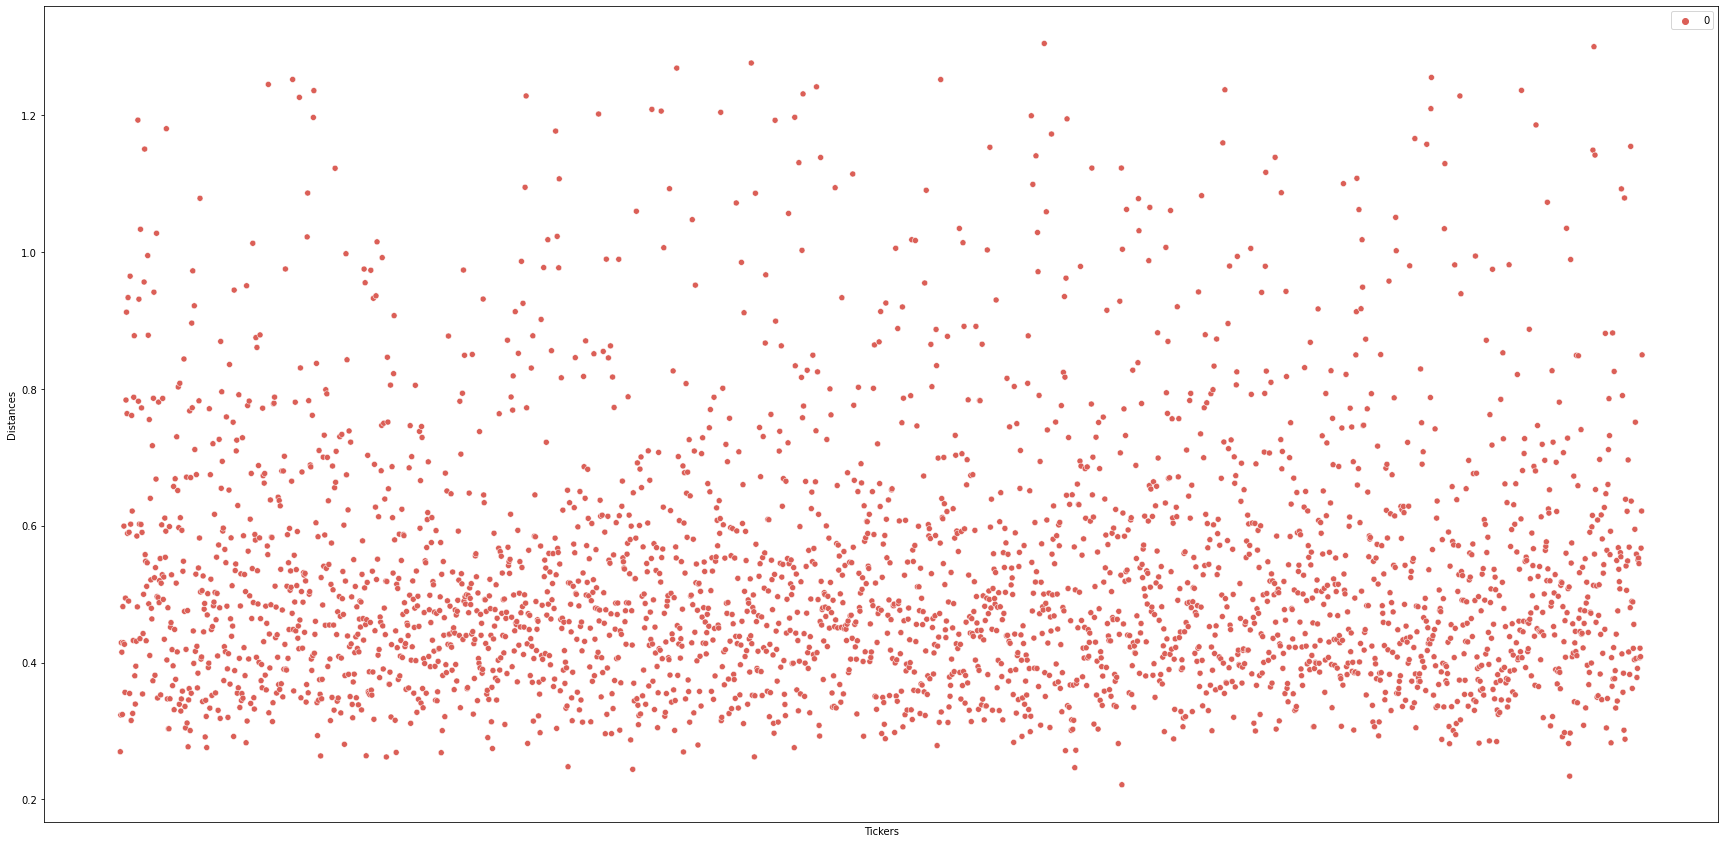

In [120]:
# change plot size
plt.figure(figsize=(30,15))
# plot distances_df
sns.scatterplot(normalized_df.index, distances_df["Distance"], hue=clusters, palette=sns.color_palette("hls", len(set(clusters))))

# hide x axis
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# add title to x axis
plt.xlabel('Tickers')
# add title to y axis
plt.ylabel('Distances')

    
plt.show()

### Resultados

In [100]:
basic_data["Cluster"].value_counts()

0    2396
1     545
Name: Cluster, dtype: int64

In [101]:
pd.options.display.max_columns = 500
basic_data.groupby("Cluster").mean()

,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR
Cluster,,,,,,,,,,,,,,
0,0.140901,0.628776,25.575125,0.233482,0.054685,0.147247,0.0,0.008841,0.0,2.116804e+10,0.077334,0.095846,19.742070,0.018512
1,0.181076,0.459100,17.768807,0.242984,0.060263,0.167981,0.0,0.006572,0.0,2.514931e+09,-0.045783,-0.040221,13.675229,0.005562


In [73]:
basic_data[basic_data["Cluster"] == 2]["Sector"].value_counts()

Healthcare                15
Technology                14
Industrials               13
Consumer Cyclical         13
Consumer Defensive         8
Financial Services         6
Basic Materials            5
Communication Services     3
Energy                     3
Real Estate                2
Name: Sector, dtype: int64

In [74]:
basic_data[(basic_data["Cluster"] == 2)]

,Name,Currency,Sector,Industry,Country,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR,Cluster
Ticker,,,,,,,,,,,,,,,,,,,,
ABEV,AMBEV S.A.,USD,Consumer Defensive,Beverages—Brewers,BR,NaN,0.1788,25,0.186415,0.000000,0.143137,0.0,0.024314,0.0,4.252582e+10,0.134788,0.173448,25.0,0.038659,2
ABMC,AMERICAN BIO MEDICA CORPORATION,USD,Healthcare,Diagnostics & Research,US,0.3054,NaN,18,0.273413,0.078125,0.200495,0.0,0.003713,0.0,6.044878e+06,-0.108612,-0.108612,18.0,0.000000,2
ACOR,"ACORDA THERAPEUTICS, INC.",USD,Healthcare,Drug Manufacturers—Specialty & Generic,US,0.0135,0.3012,16,0.194643,0.039062,0.116112,0.0,0.009001,0.0,3.569086e+07,-0.292813,-0.292813,11.0,0.000000,2
ADMT,"ADM TRONICS UNLIMITED, INC.",USD,Healthcare,Medical Devices,US,0.4449,NaN,32,0.336607,0.105469,0.228548,0.0,0.028053,0.0,8.786504e+06,-0.050018,-0.050018,29.0,0.000000,2
AIZ,"ASSURANT, INC.",USD,Financial Services,Insurance—Specialty,US,0.0087,0.9664,18,0.211111,0.243056,0.122525,0.0,0.006931,0.0,9.302144e+09,0.131199,0.140125,18.0,0.008926,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UMHL,UMATRIN HOLDING LIMITED,USD,Consumer Cyclical,Specialty Retail,MY,0.7685,NaN,14,0.410317,0.239583,0.240099,0.0,0.009901,0.0,2.189331e+06,-0.315745,-0.315745,7.0,0.000000,2
USNU,"U.S. NEUROSURGICAL HOLDINGS, INC.",USD,Healthcare,Medical Care Facilities,US,0.2772,0.2026,15,0.294558,0.071429,0.188119,0.0,0.002475,0.0,1.753242e+06,0.106682,0.106682,10.0,0.000000,2
VEII,"VALUE EXCHANGE INTERNATIONAL, INC.",USD,Technology,Information Technology Services,HK,0.5969,NaN,14,0.388278,0.240385,0.182461,0.0,0.002829,0.0,1.247040e+06,-0.206653,-0.206653,8.0,0.000000,2


C:\Users\juani\AppData\Local\Temp\ipykernel_6640\3348806314.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=num_cols)


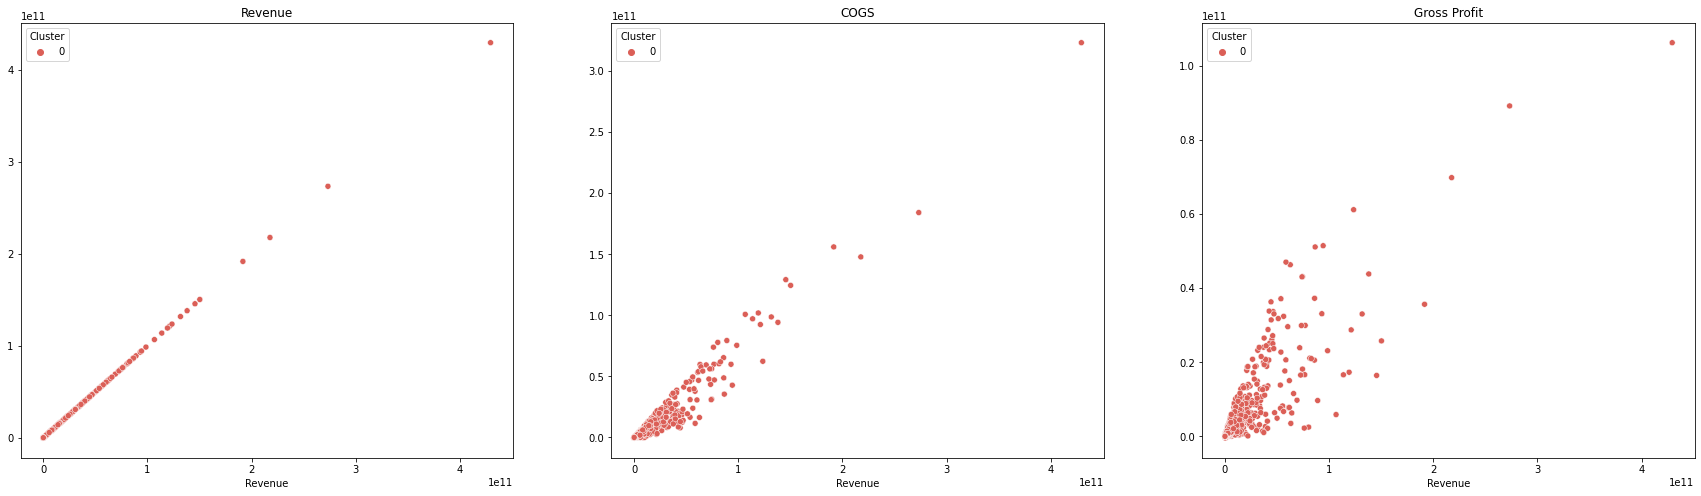

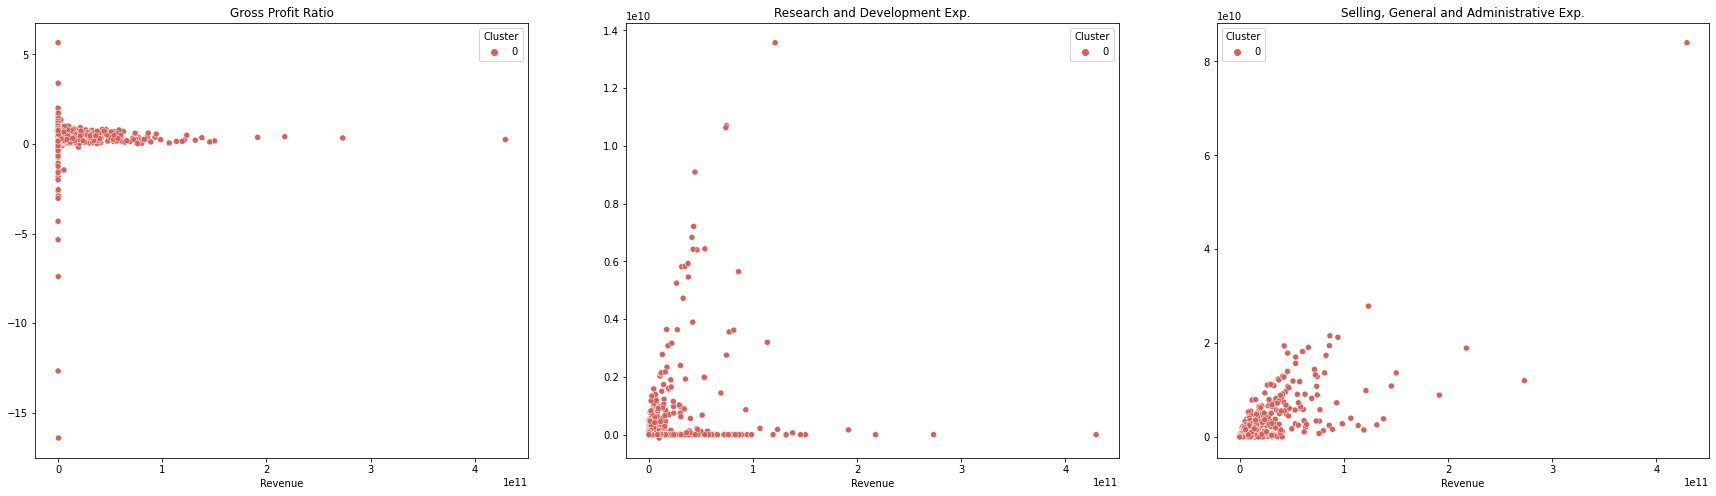

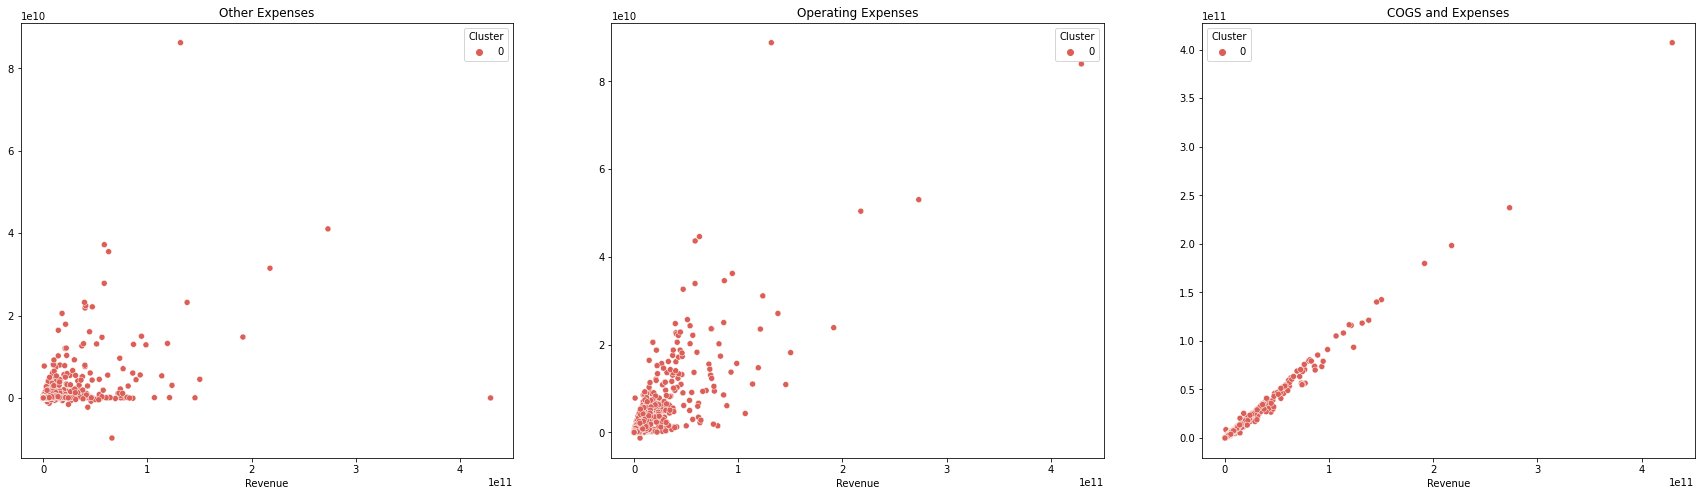

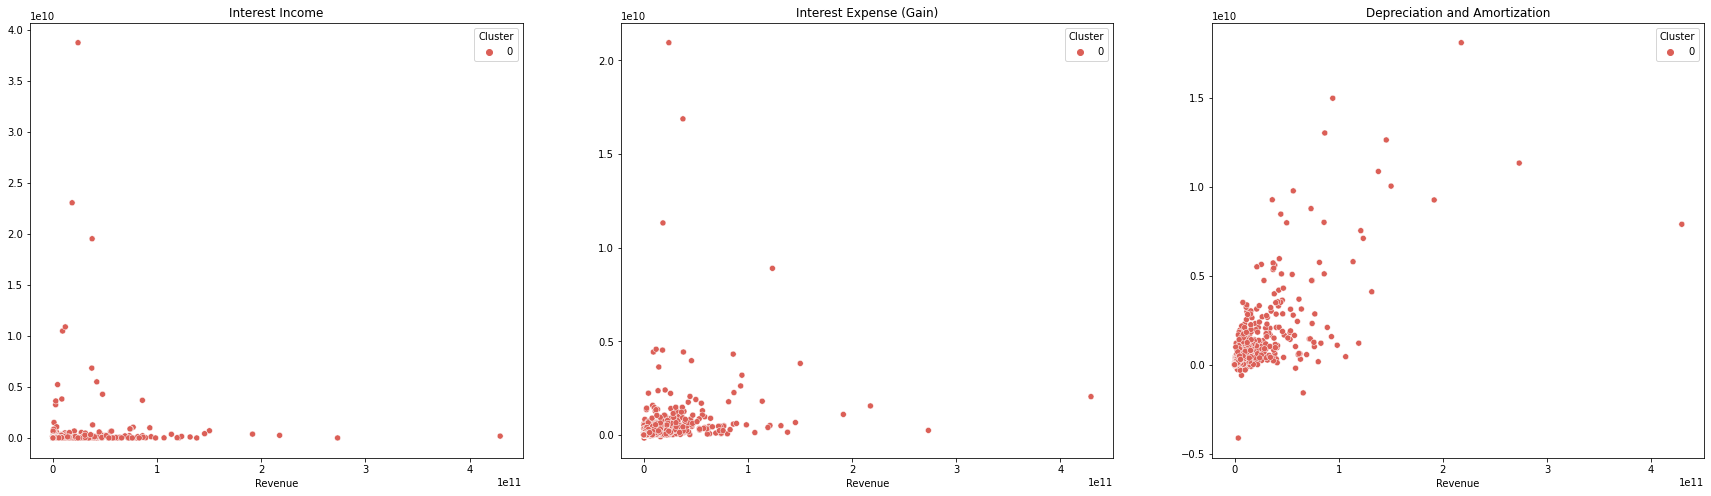

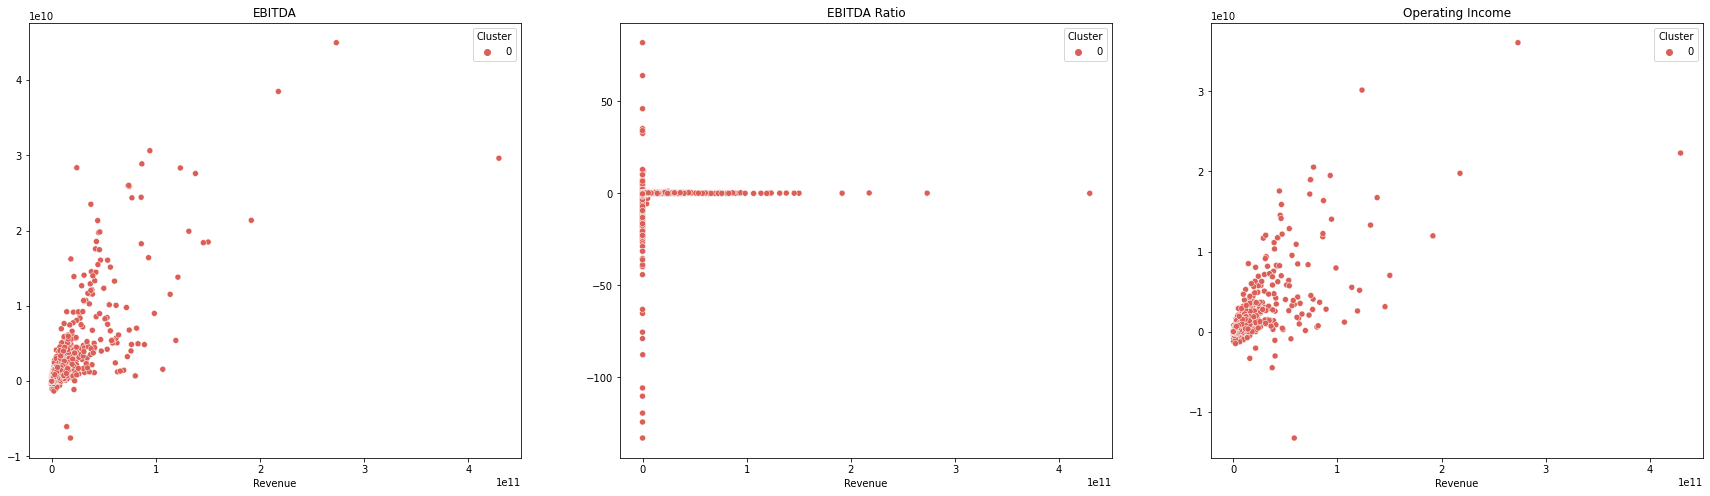

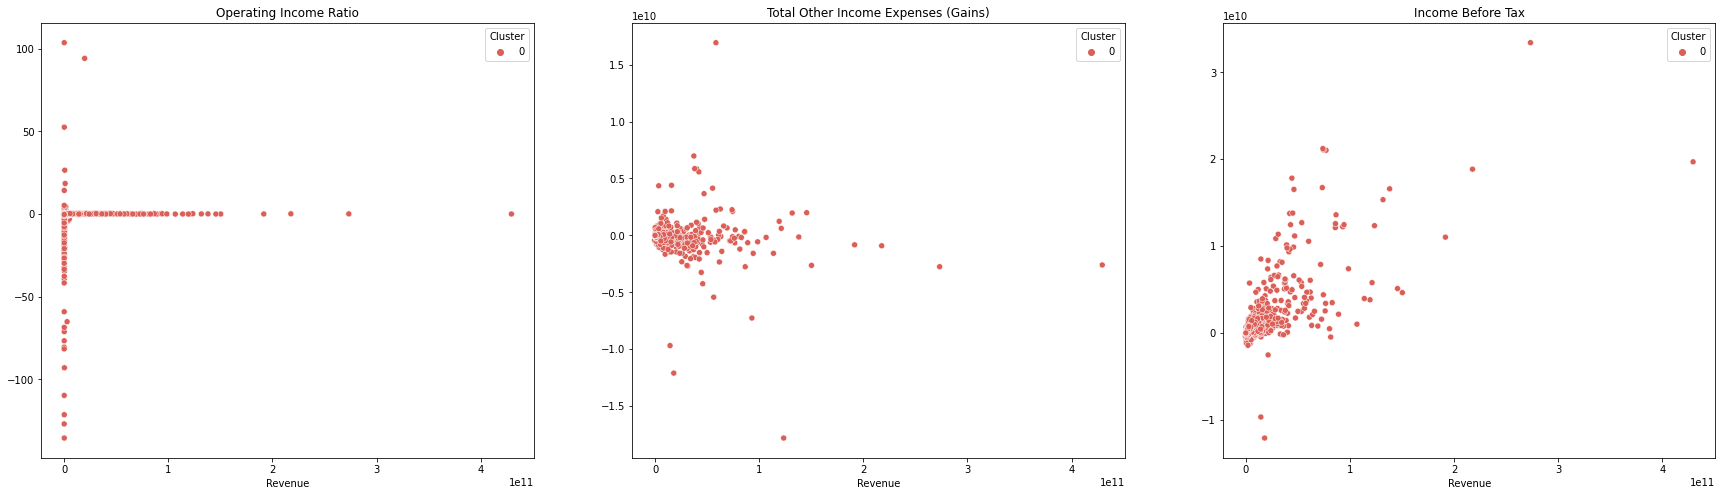

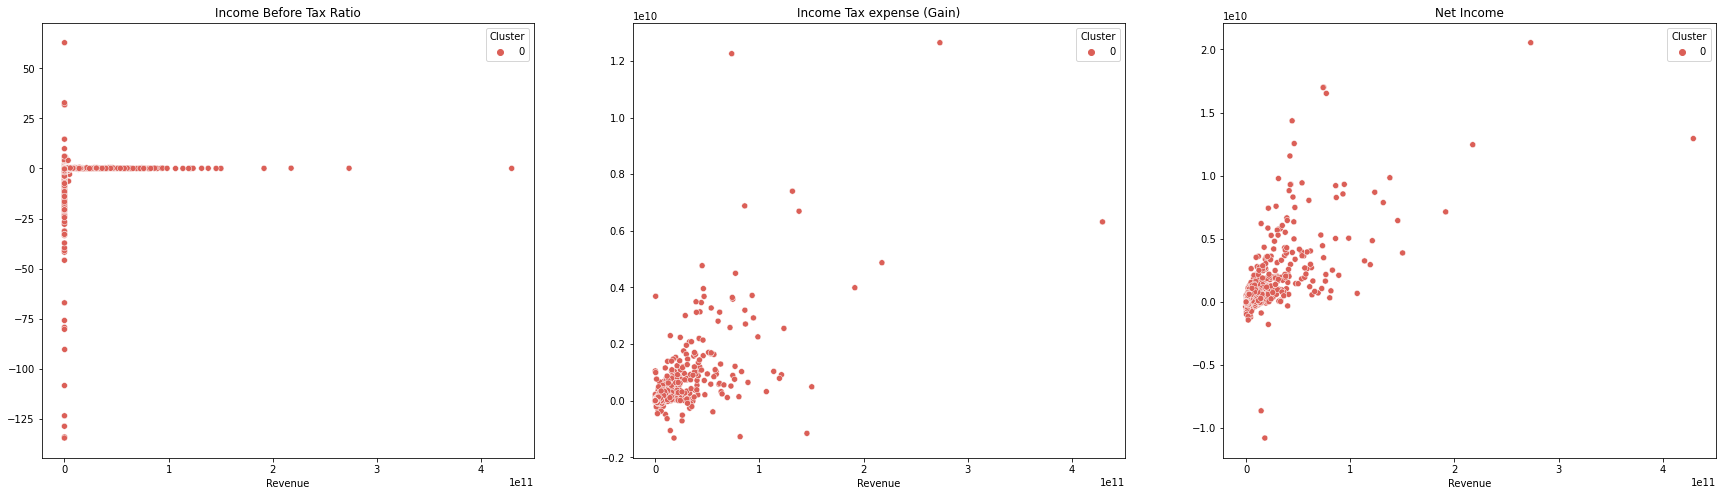

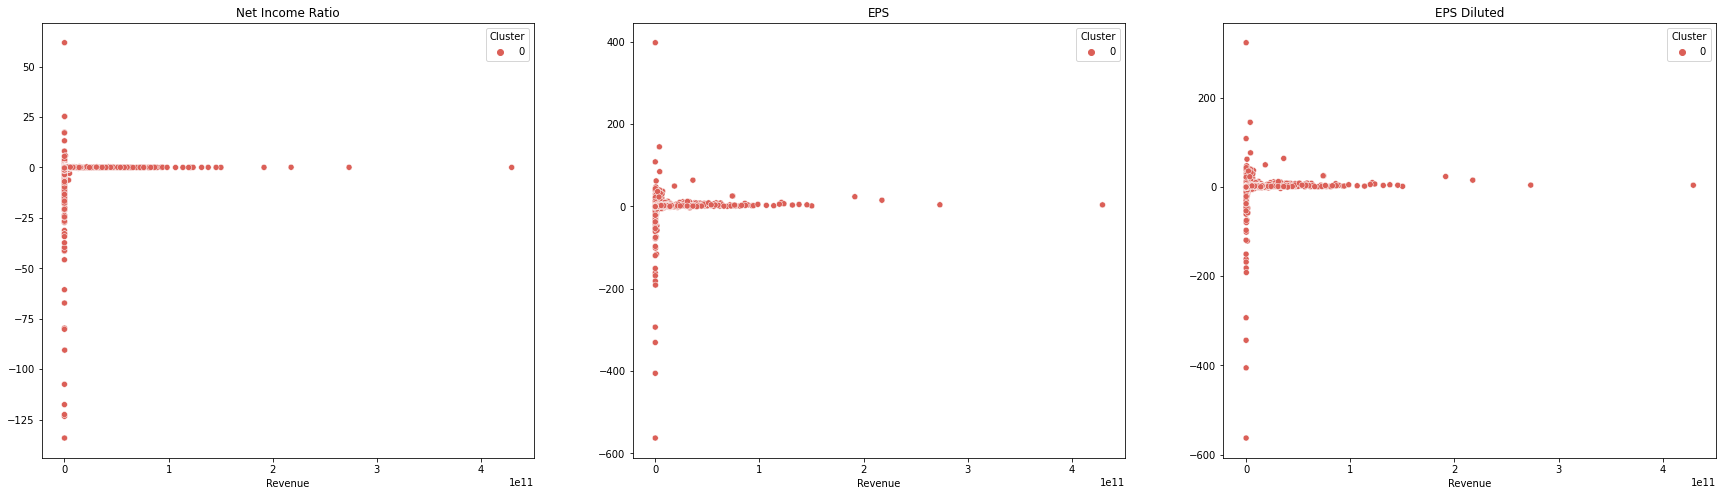

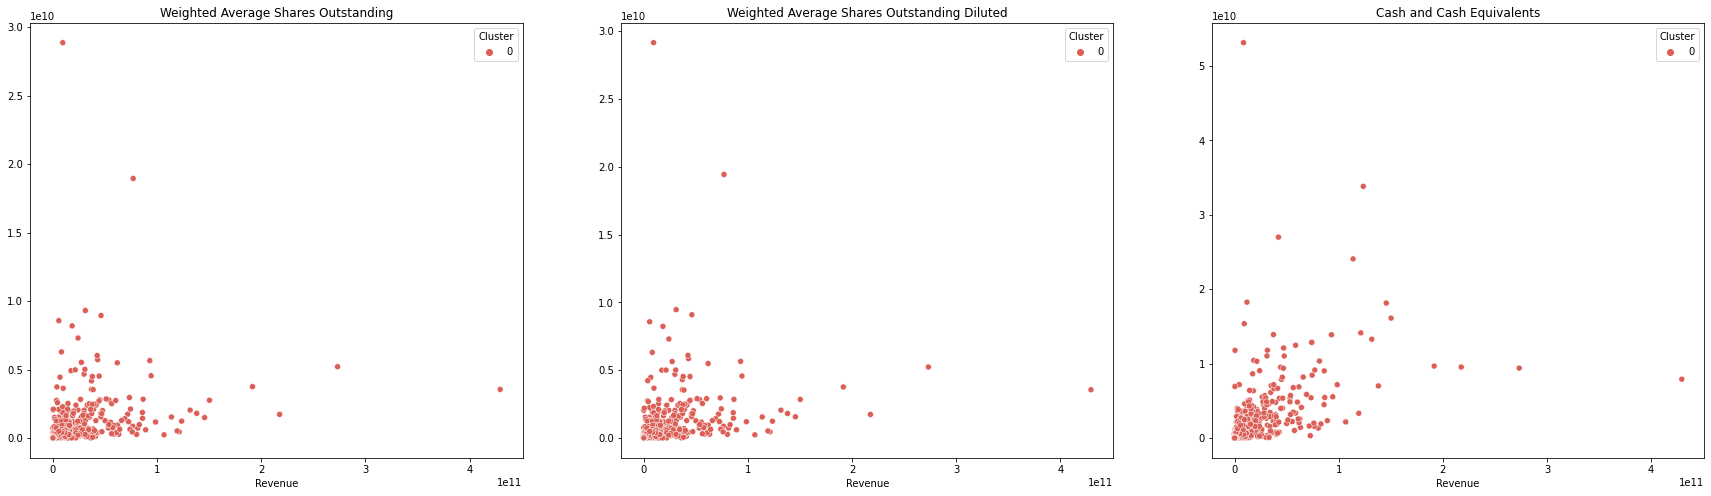

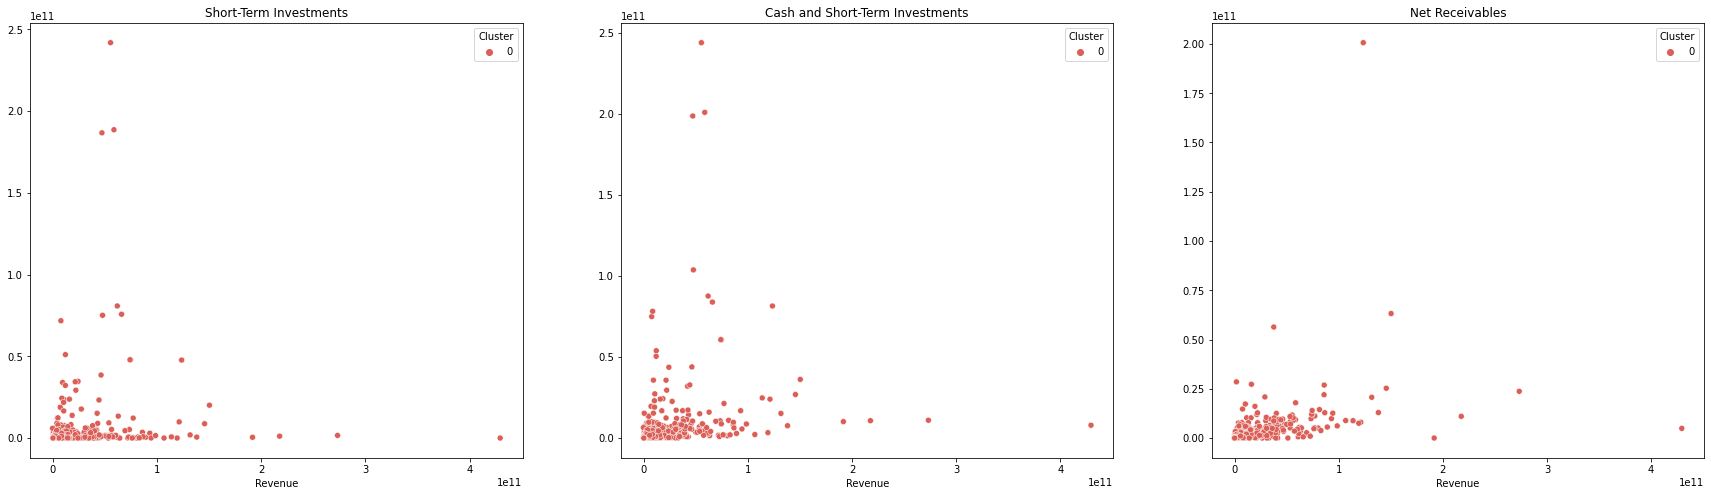

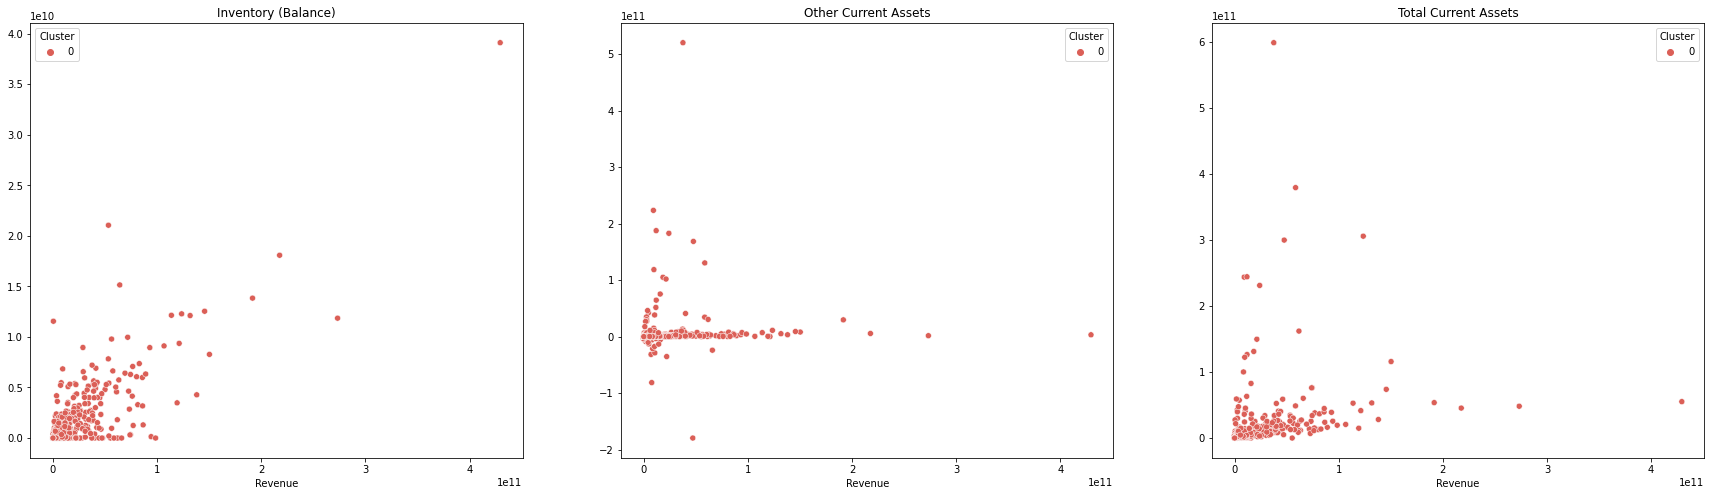

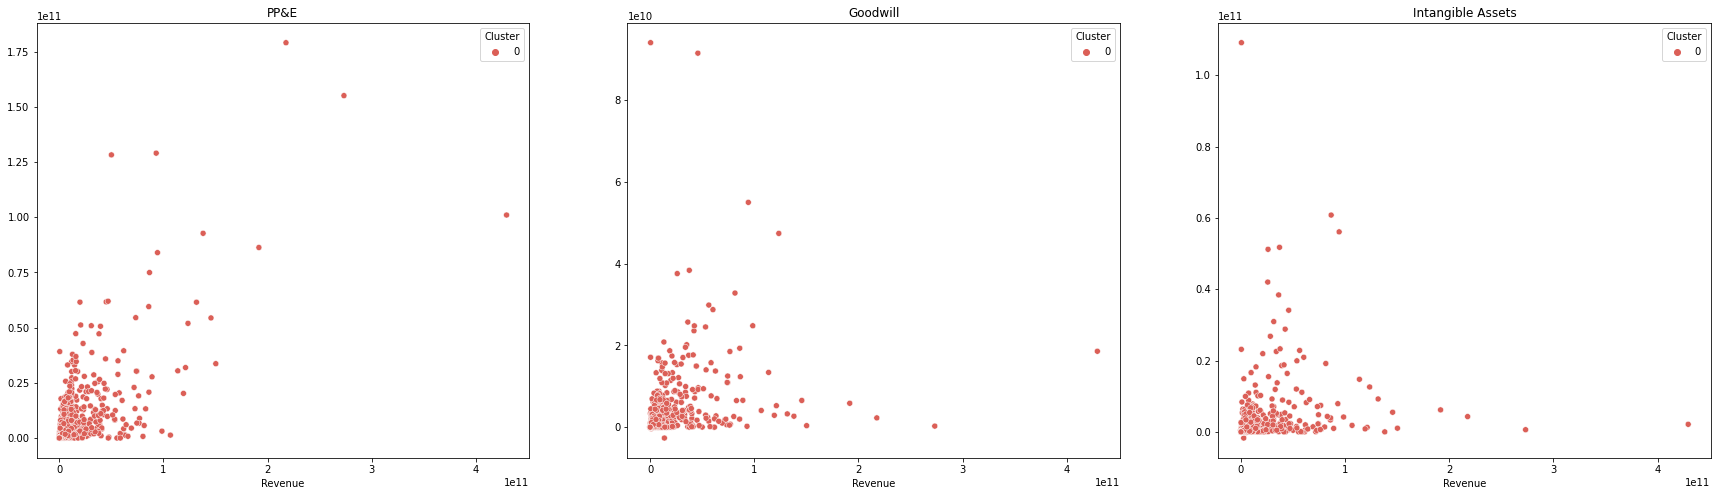

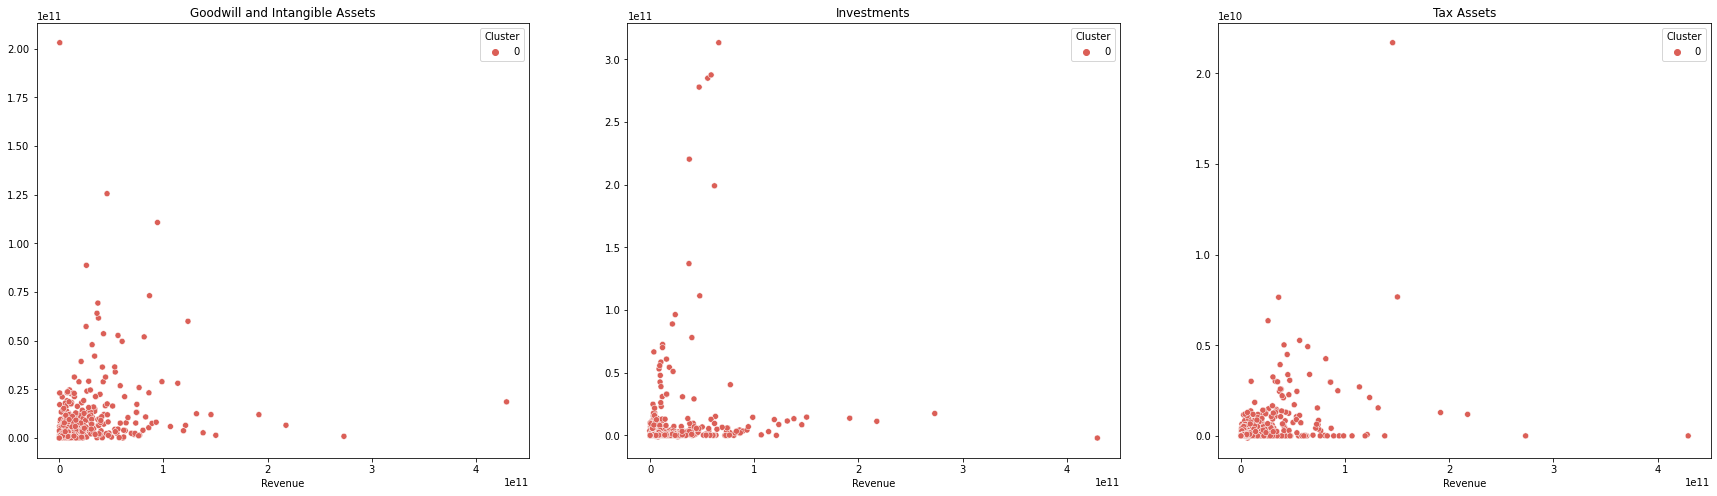

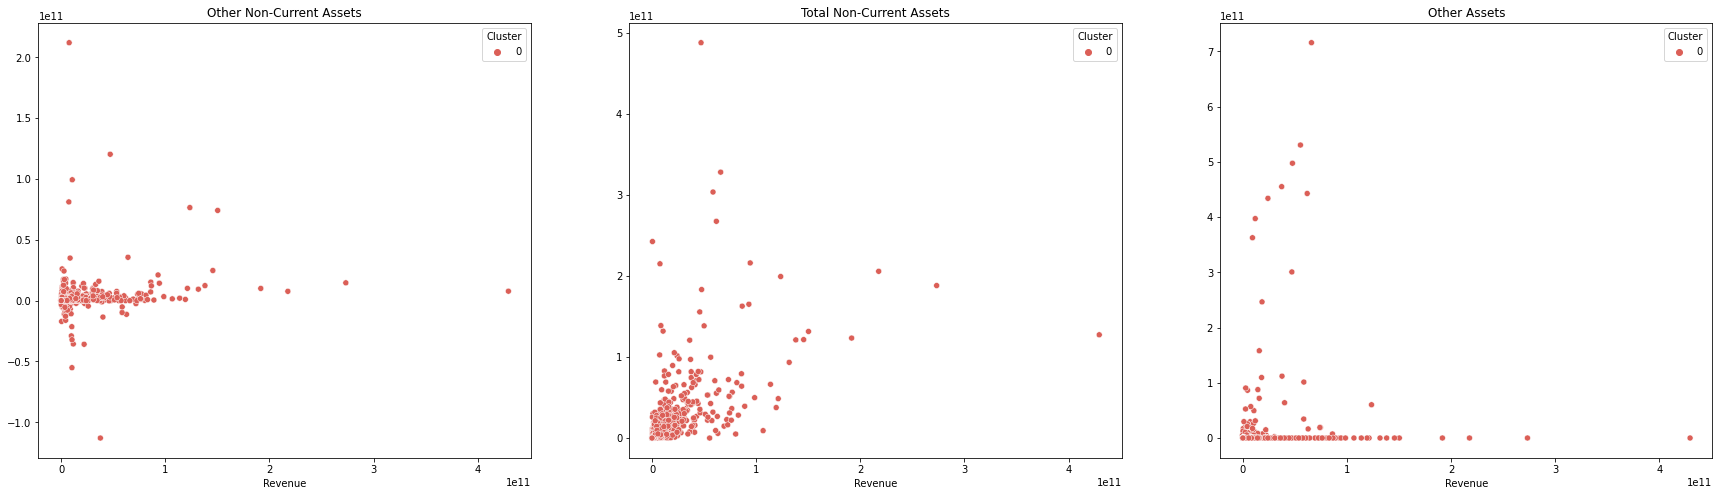

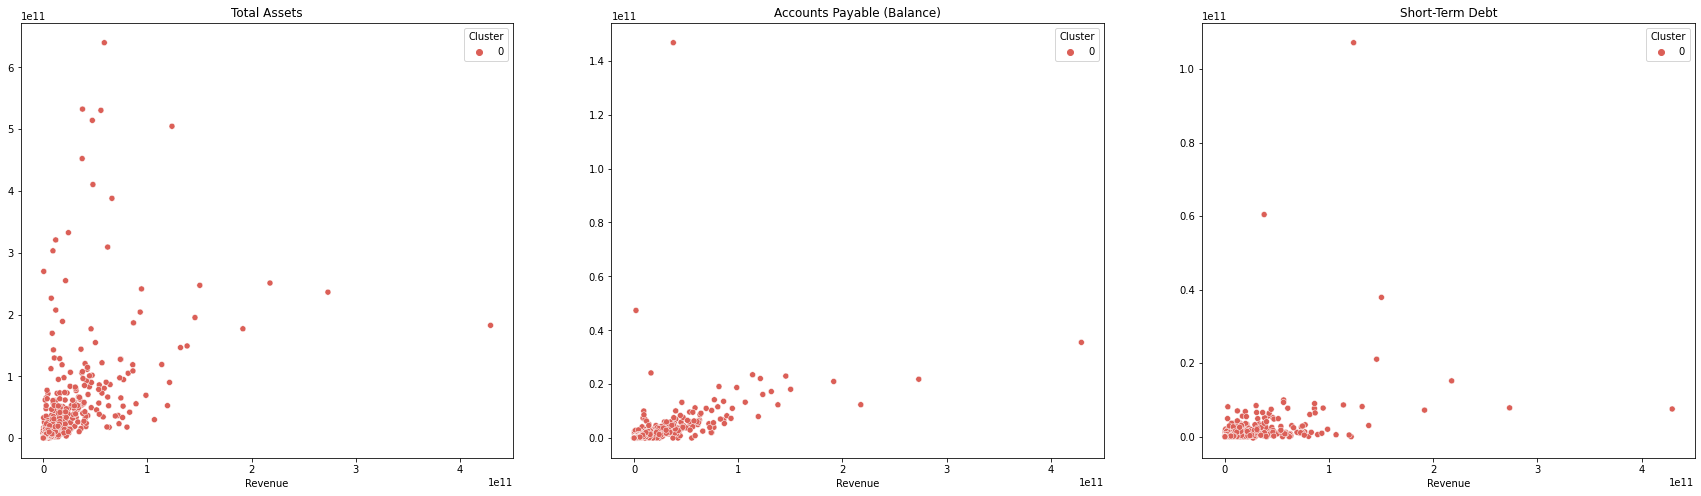

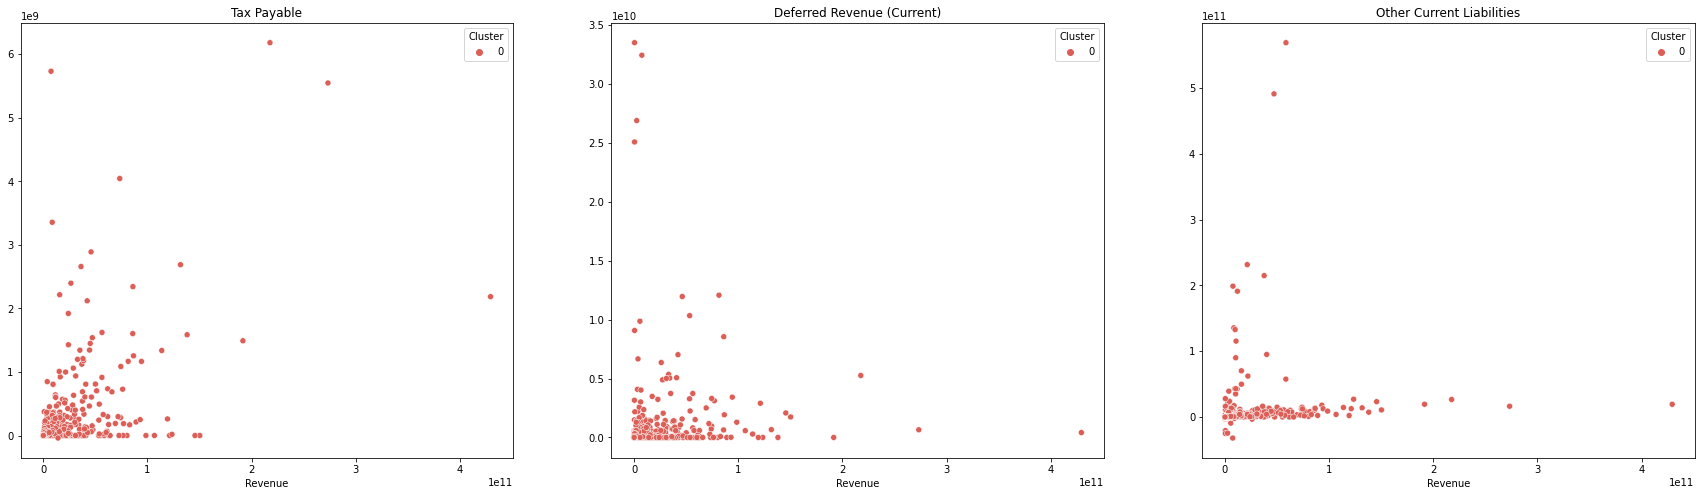

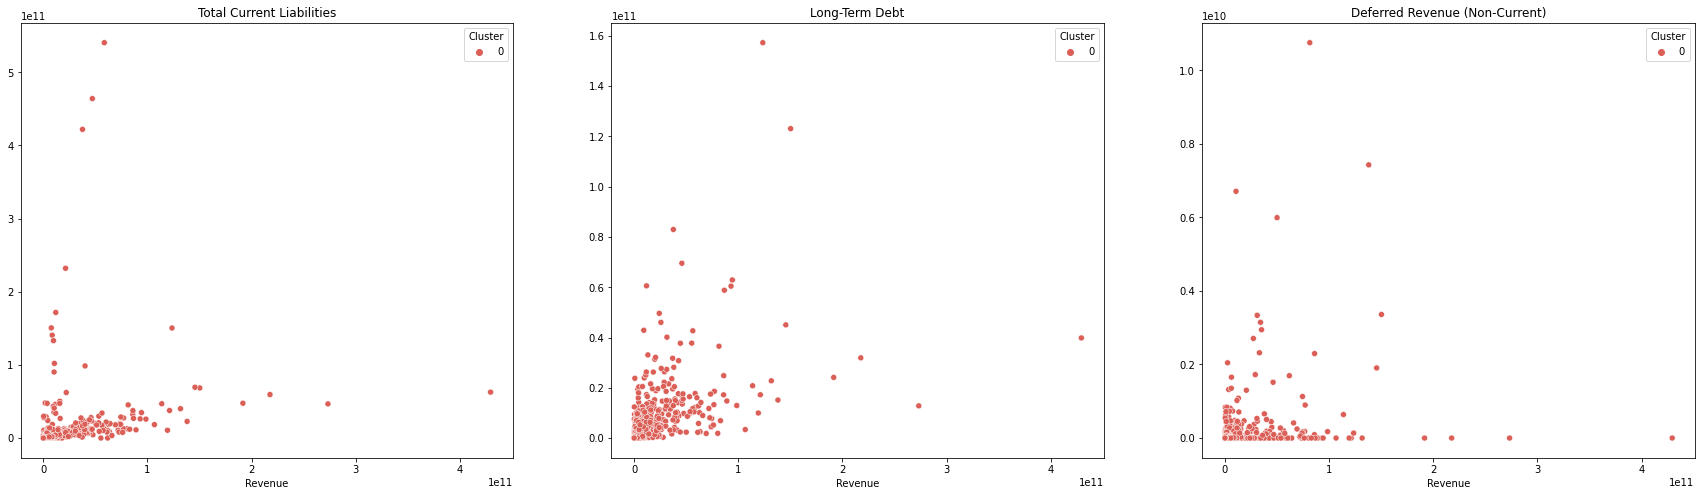

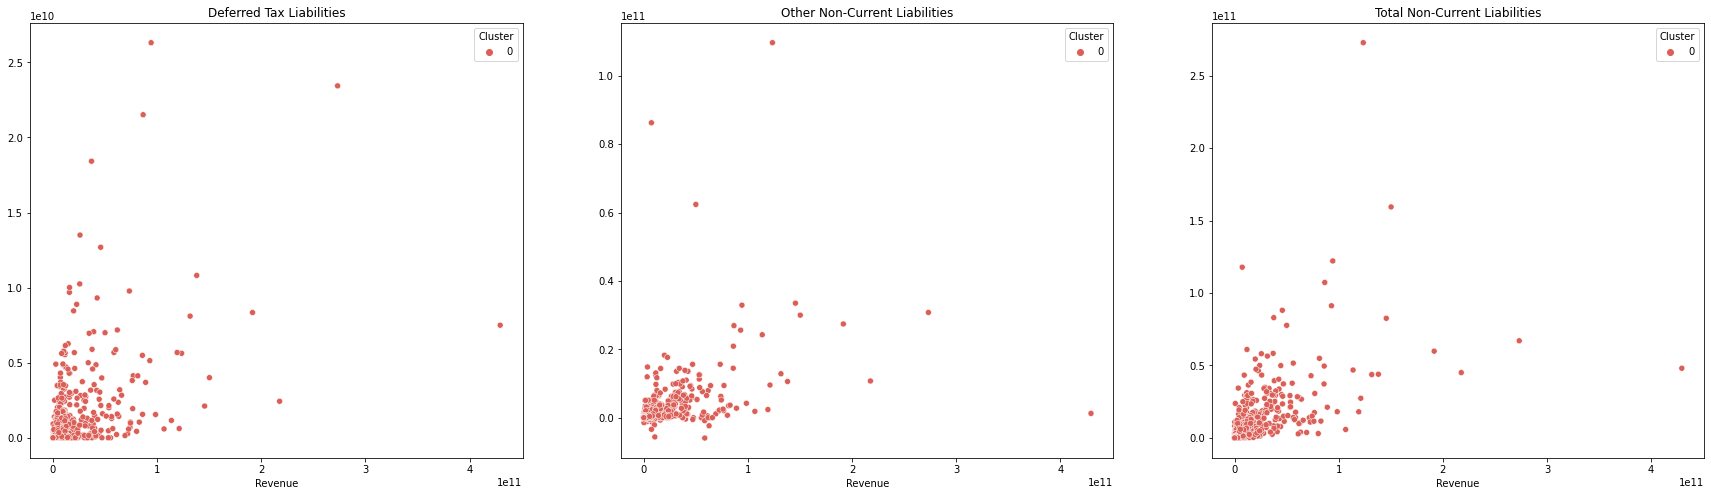

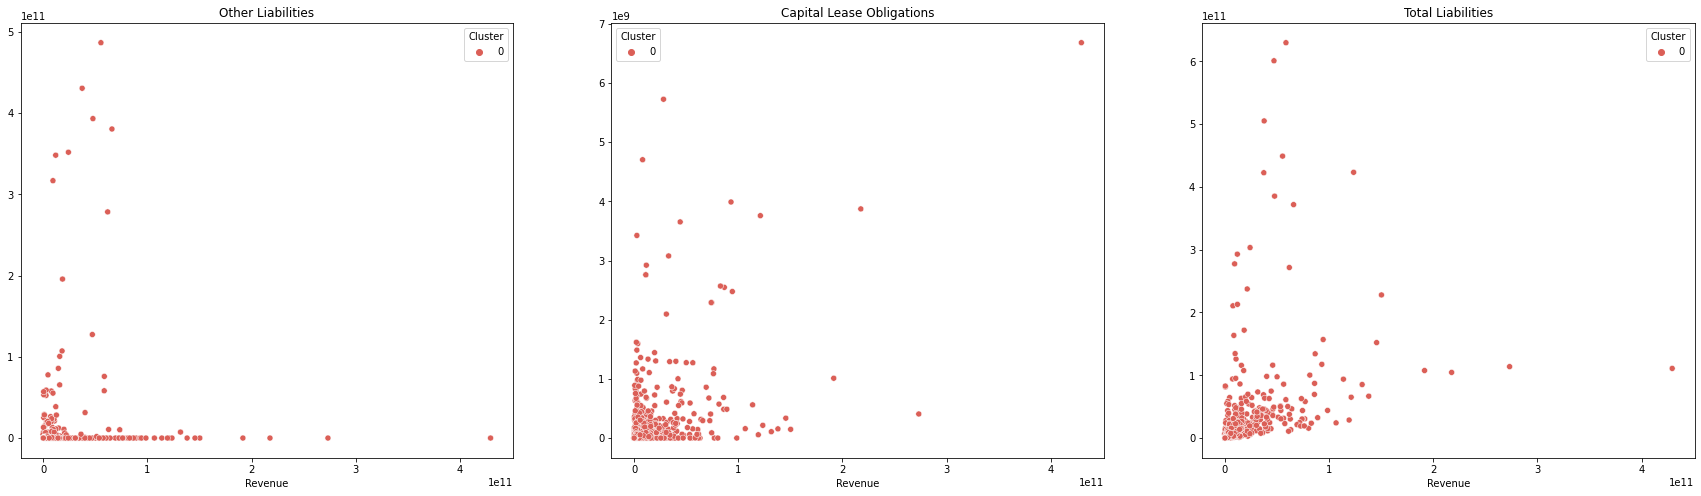

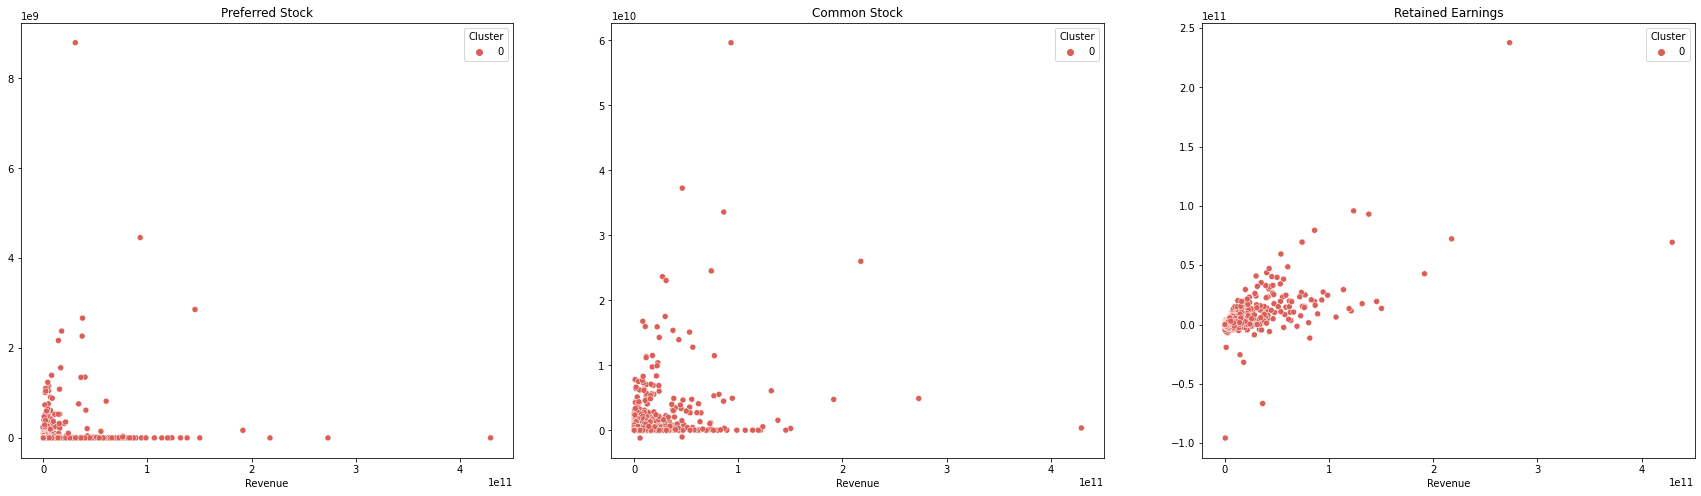

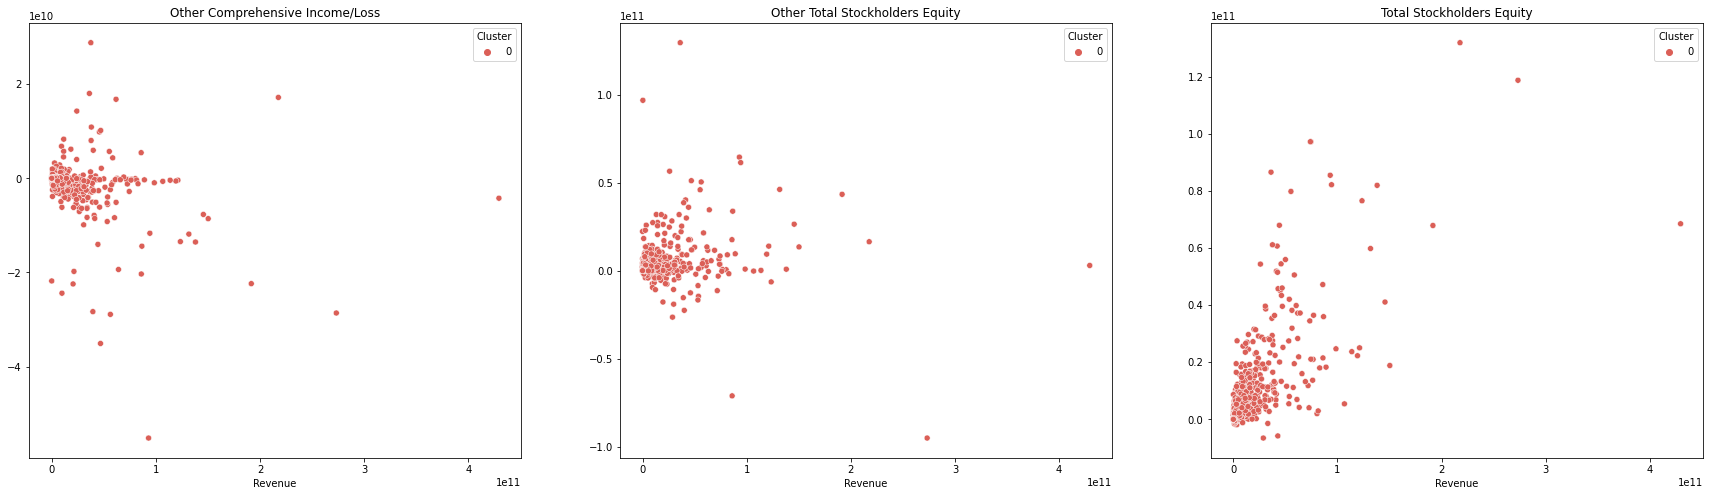

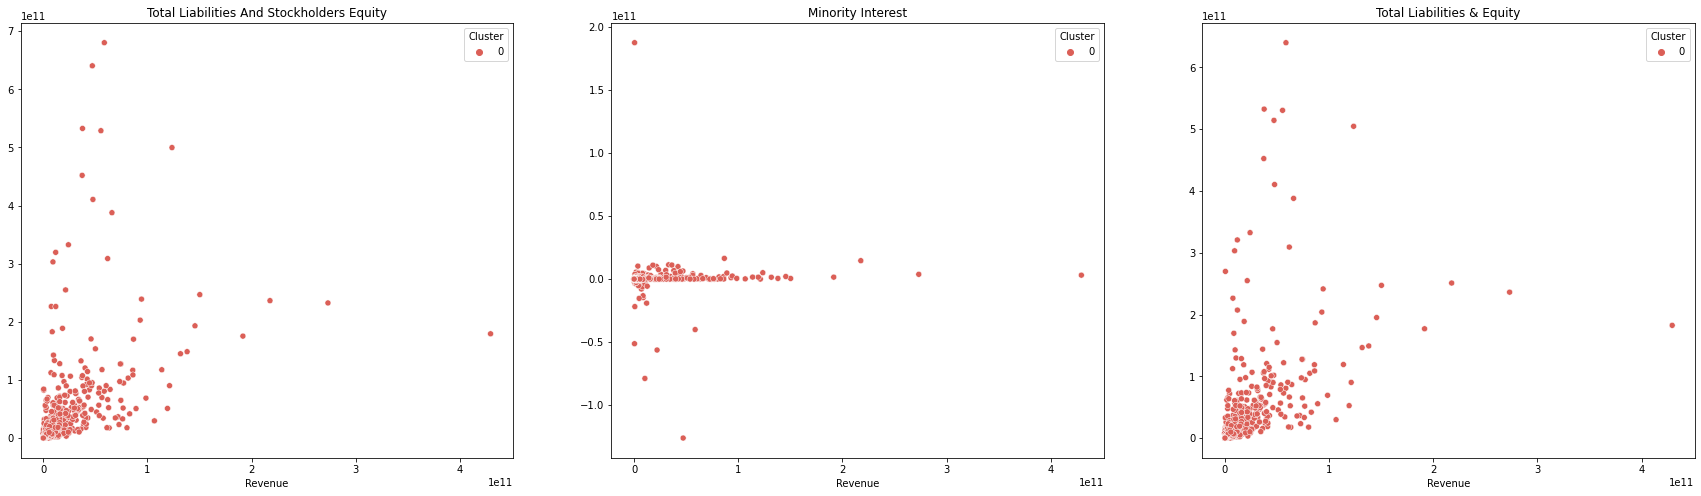

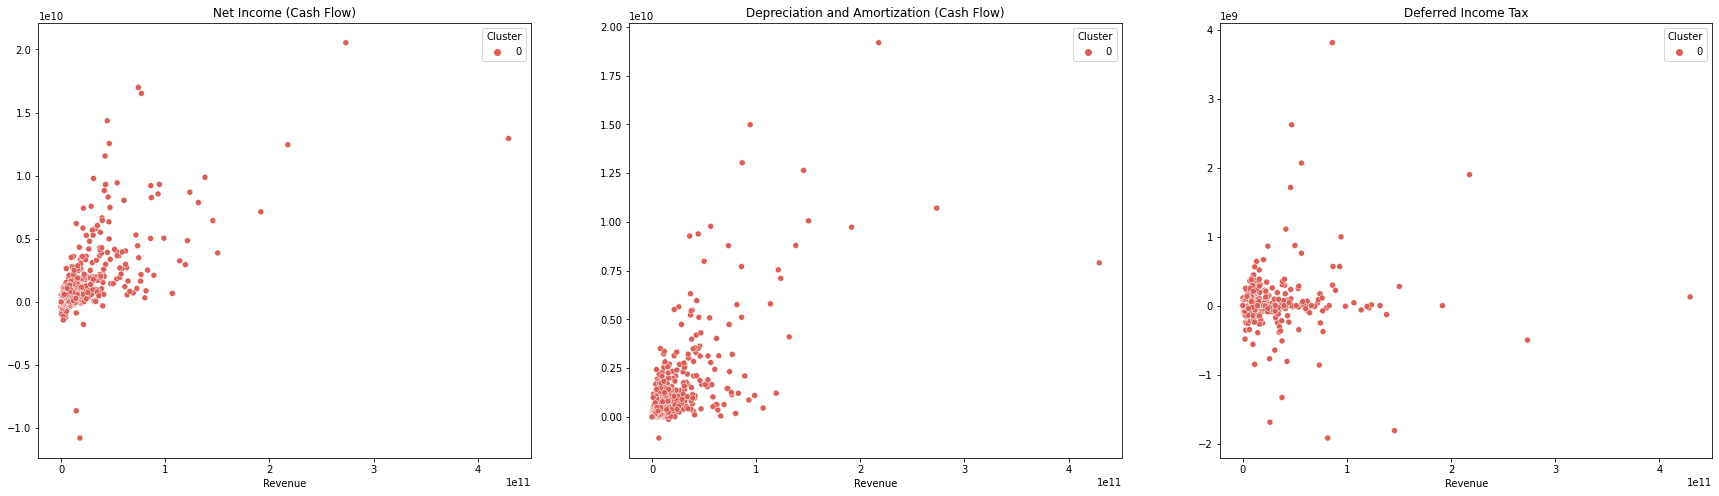

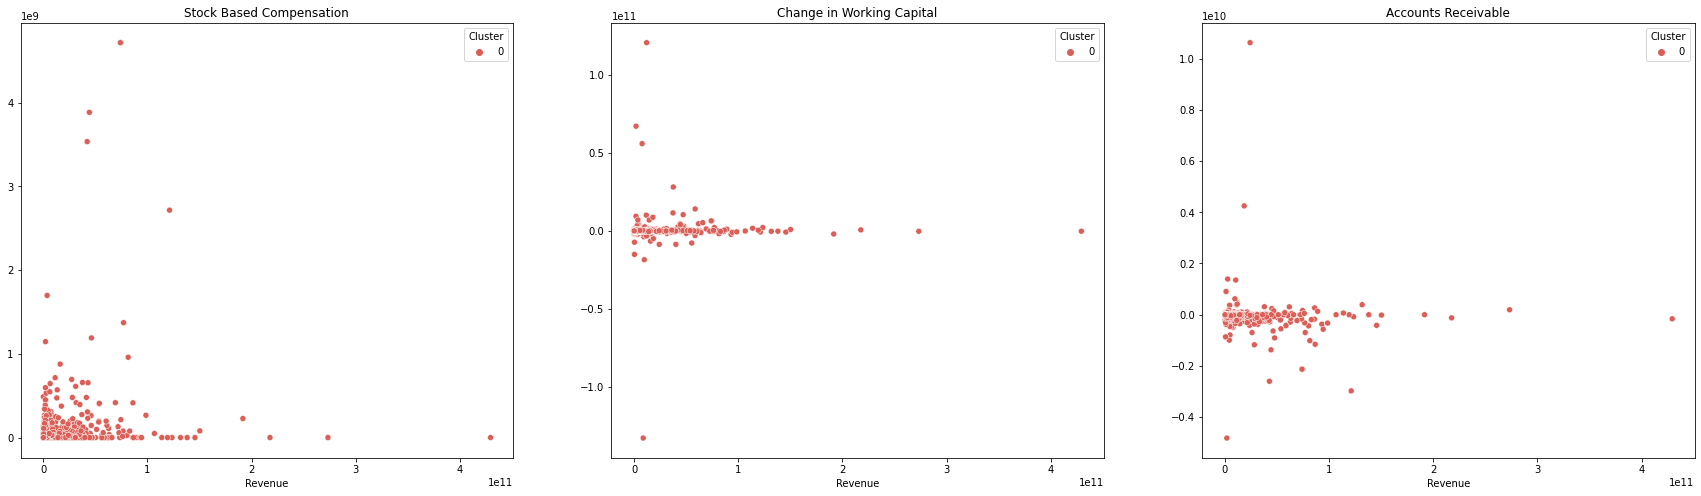

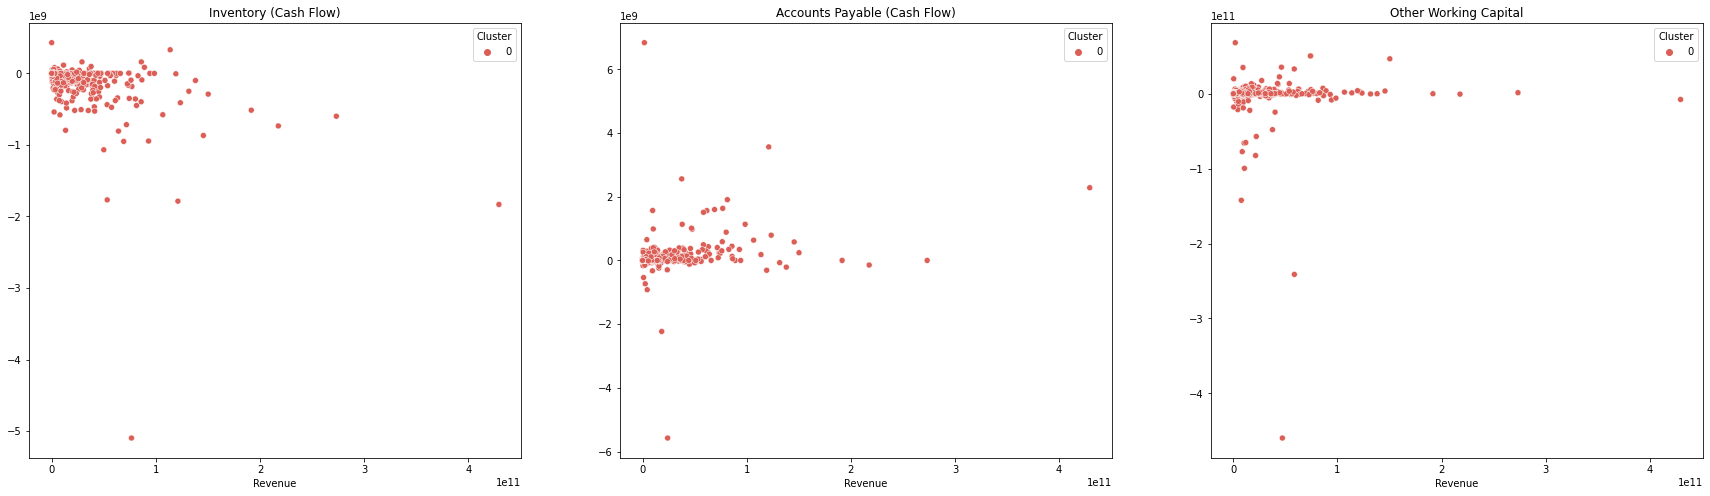

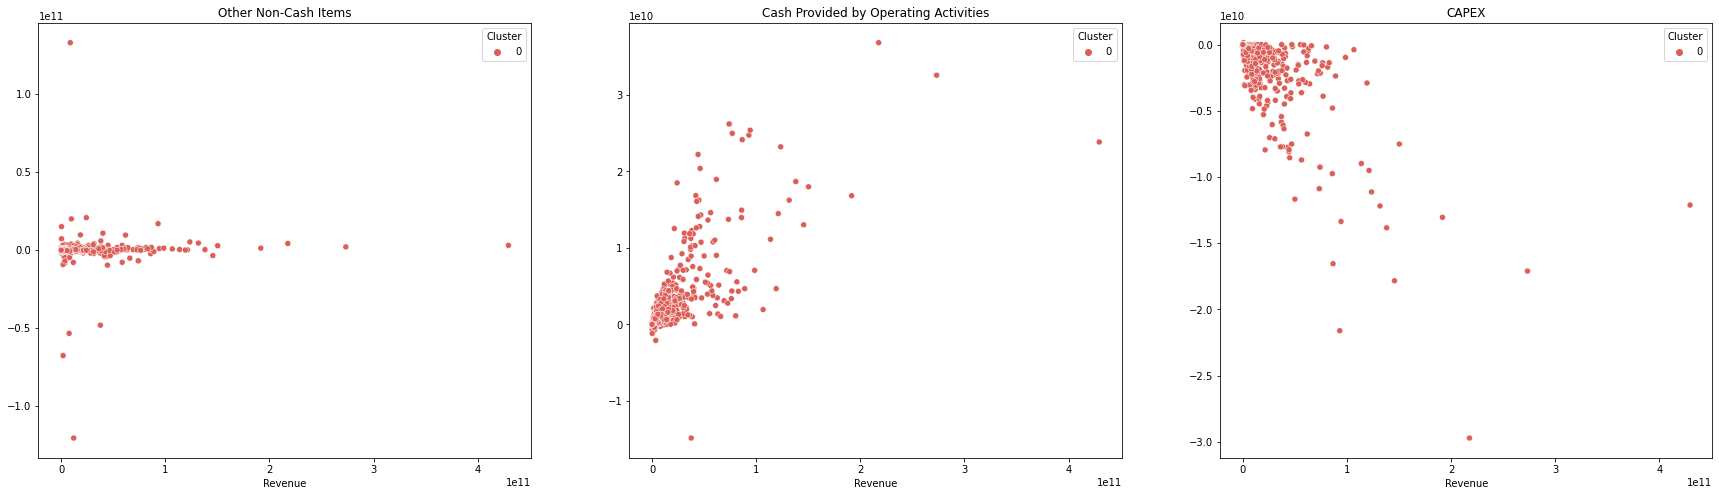

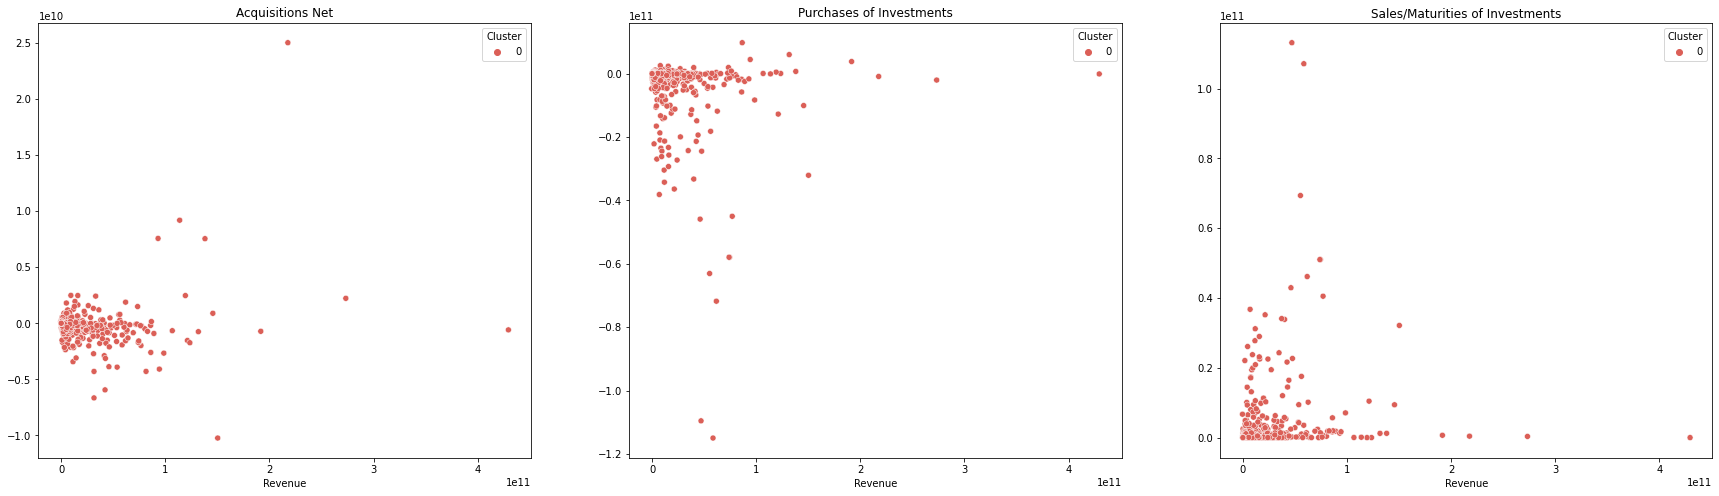

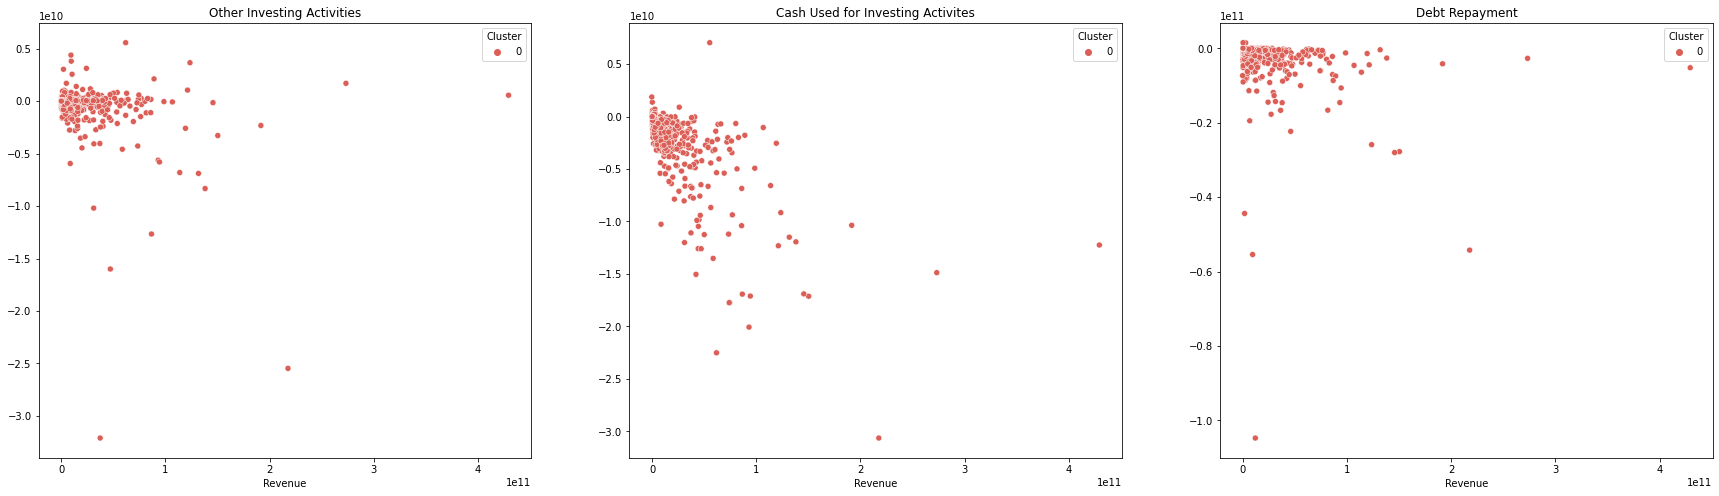

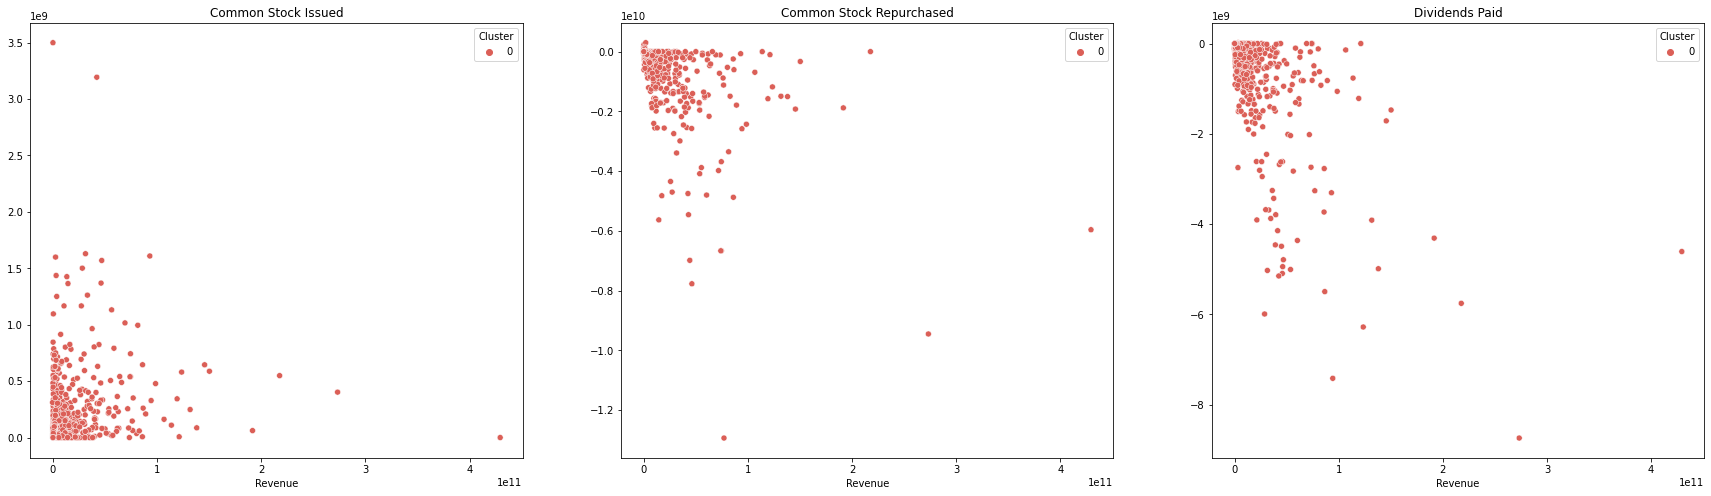

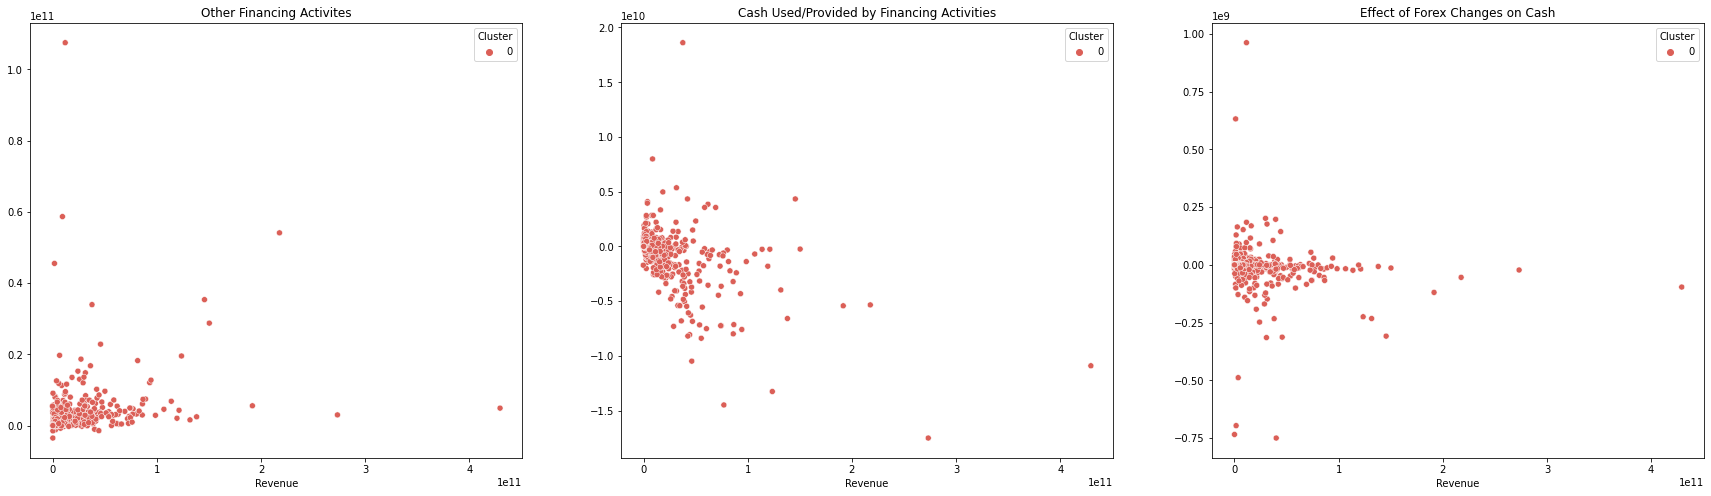

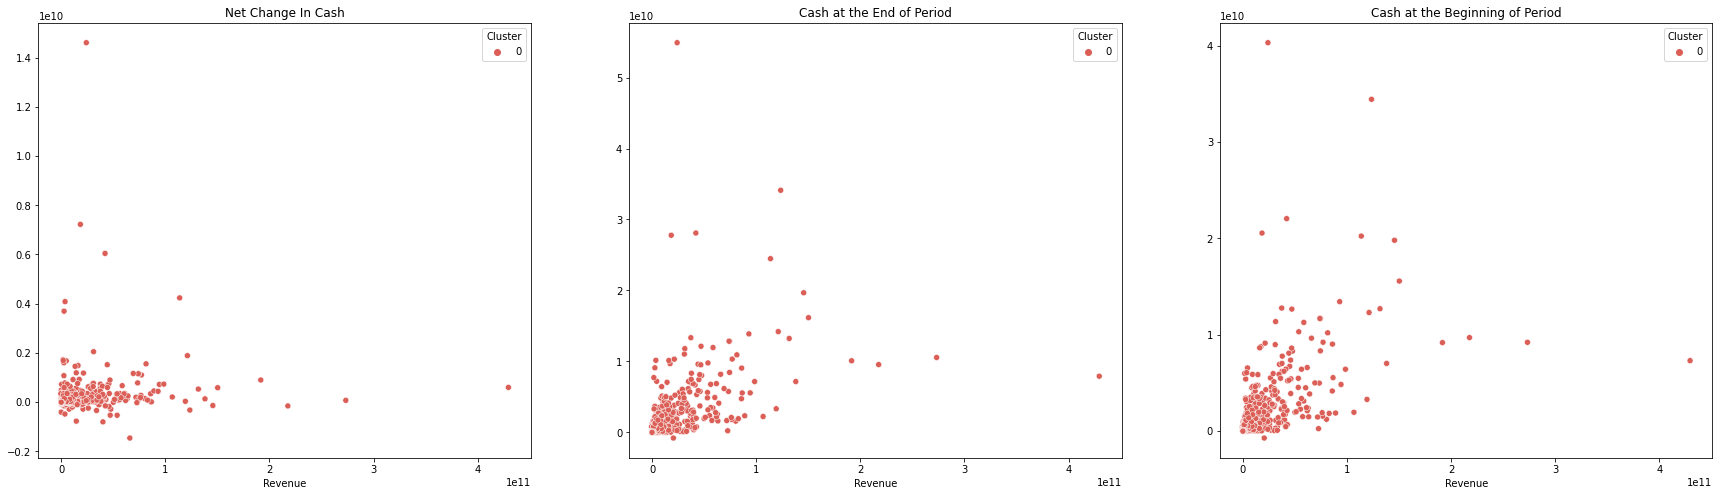

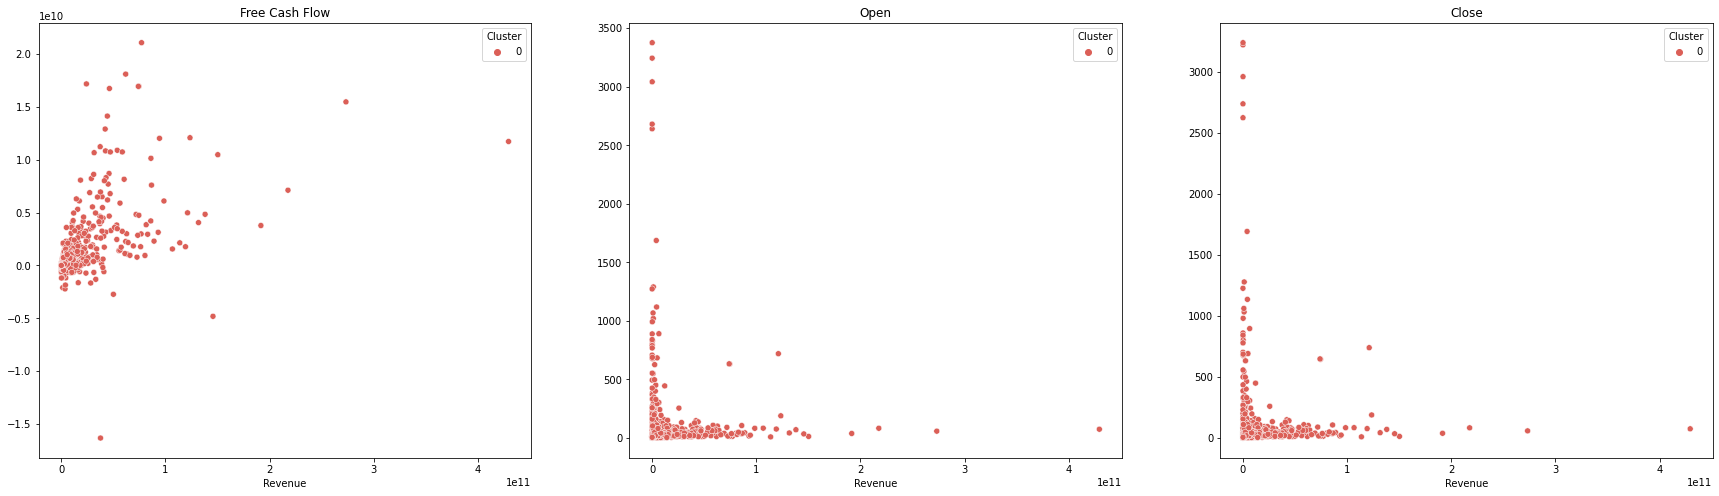

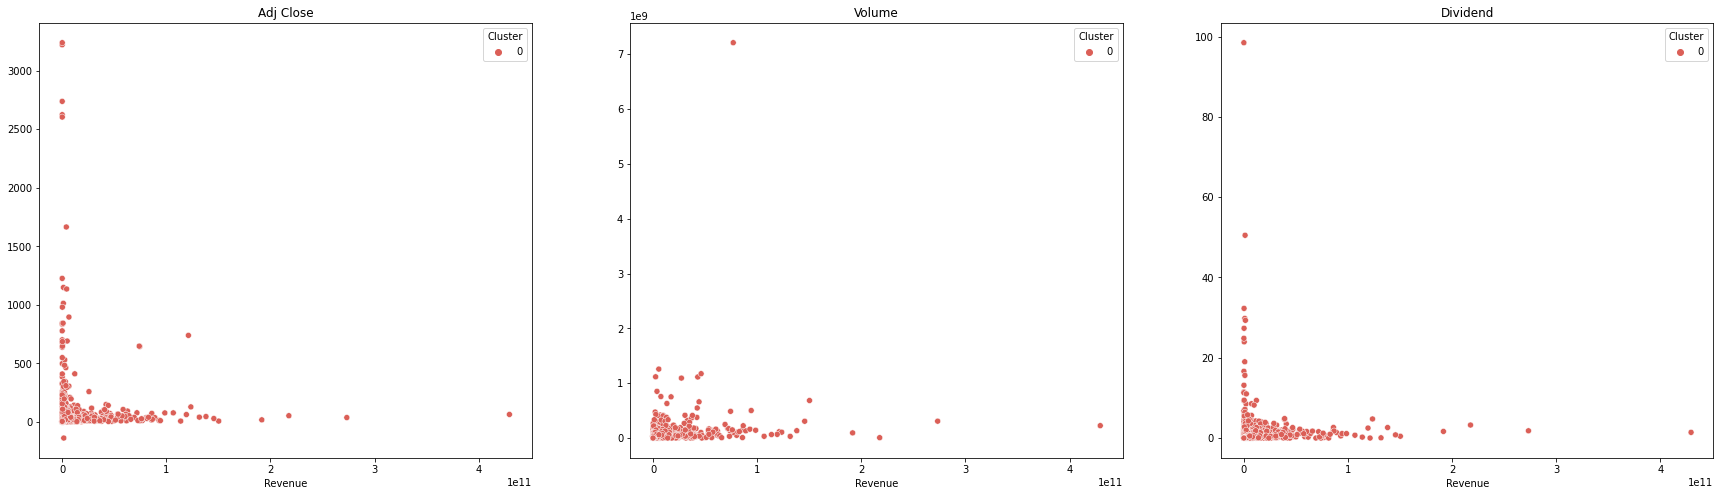

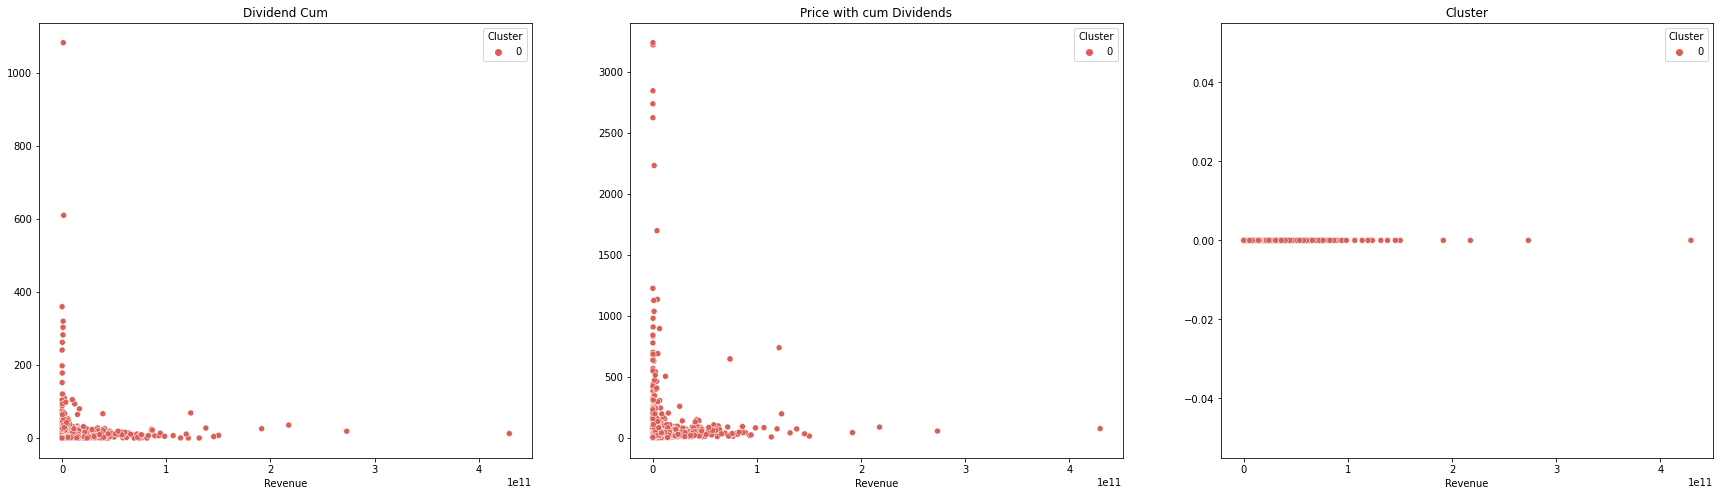

In [148]:
plt.rcParams['figure.figsize'] = [30, 8]

num_cols = 3
num_rows = int(res_df.shape[1]/num_cols)


desfase_texto_x = res_df["Revenue"].mean() / 2

for j in range(num_rows):
    desfase = (j*num_cols)

    if desfase >= 103:
        break
    fig, axs = plt.subplots(ncols=num_cols)
    

    for i in range(num_cols):
        columna = res_df.columns[i+desfase]
        

        sns.scatterplot(x=res_df["Revenue"], y=res_df[columna], ax=axs[i],hue=res_df["Cluster"], palette=sns.color_palette("hls", 1))
        # for index, row in res_df.iterrows():
        #     axs[i].text(x=res_df.loc[index, "Market Cap"] + desfase_texto_x, y=res_df.loc[index, columna], s=index)

        axs[i].set_title(columna)
        axs[i].set_ylabel('')

